In [1]:
import pandas as pd
from tech_core.feature_pipeline import FeaturesPipeline
from tech_core.losses import StreamingSharpeLoss
from tech_core.nn_builder import SimplePortfolioAllocator, DeepPortfolioAllocator_1, LSTMPortfolioAllocator
import torch
from tqdm import tqdm

In [2]:
path_to_data = '../data/'

split_dates = [
    pd.Timestamp("2025-01-01")
]
split_names = ['train', 'test']

fee = 1.53e-4
padding = 35
batch_size_config = {
    0: 1000,
    # 40: 4000,
    # 80: 10000
}
num_epochs = 1000
adam_lr = 1e-1
log_freq = 5

Loading features: 0it [00:00, ?it/s]


cmf_dim: 126, asset_dim: 5, num_assets: 488


  0%|          | 0/1000 [00:00<?, ?it/s]

Changing batch size to 1000 at epoch 0


  0%|          | 4/1000 [03:51<15:33:35, 56.24s/it]

Sharpe Ratio for the epoch: 3.4765
Average Weights:



Weight
Cash  0.407312
IRM   0.067778
GRMN  0.065517
IP    0.058227
BKNG  0.049106
...        ...
DG    0.000006
AAL   0.000005
BBY   0.000005
ALB   0.000005
TGT   0.000004

[489 rows x 1 columns]

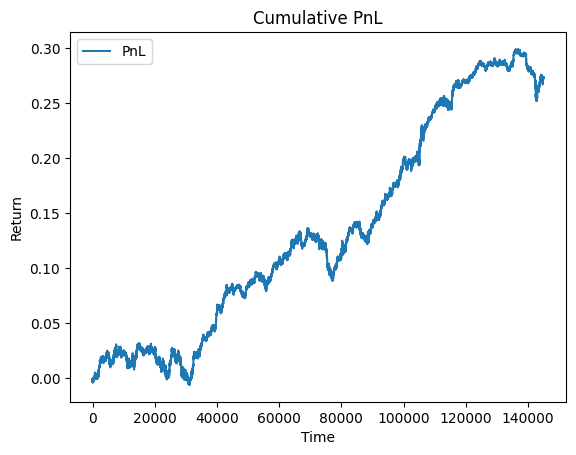

Sharpe Ratio for the epoch: 4.5016
Average Weights:



Weight
Cash  0.408188
IP    0.094356
BKNG  0.056971
IRM   0.053115
GRMN  0.043370
...        ...
DG    0.000005
AAL   0.000004
BBY   0.000004
ALB   0.000004
TGT   0.000003

[489 rows x 1 columns]

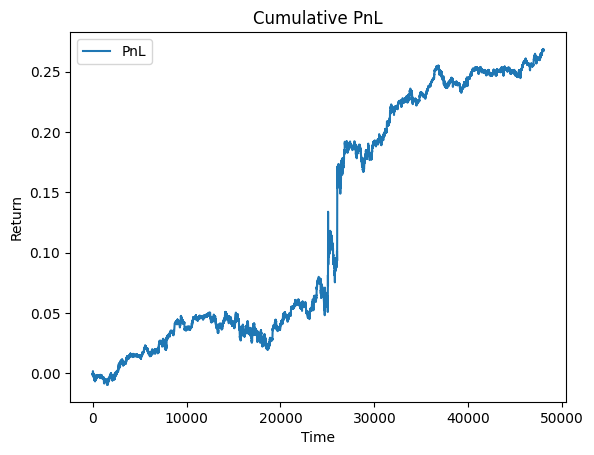

  1%|          | 9/1000 [08:18<14:51:17, 53.96s/it]

Sharpe Ratio for the epoch: 5.7028
Average Weights:



Weight
Cash  8.695260e-01
MPWR  1.642608e-02
FICO  1.632972e-02
BKNG  1.386594e-02
GRMN  1.341114e-02
...            ...
DOW   4.246942e-07
AAL   3.842339e-07
BBY   3.654443e-07
ALB   3.464922e-07
TGT   3.164344e-07

[489 rows x 1 columns]

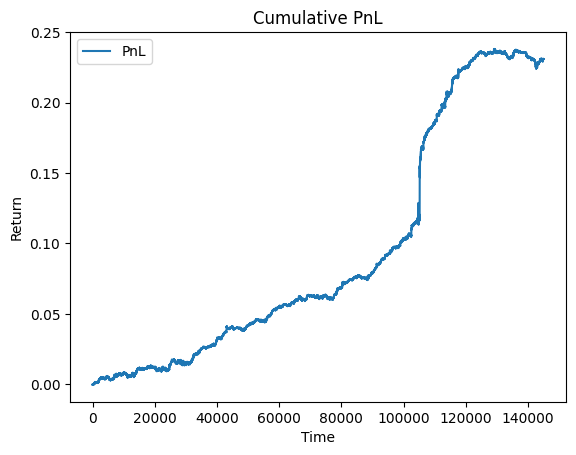

Sharpe Ratio for the epoch: 4.3100
Average Weights:



Weight
Cash  8.400156e-01
BKNG  2.157270e-02
GRMN  1.740914e-02
FICO  1.671820e-02
IRM   1.574502e-02
...            ...
DOW   4.455516e-07
AAL   4.036363e-07
BBY   3.846567e-07
ALB   3.641069e-07
TGT   3.342149e-07

[489 rows x 1 columns]

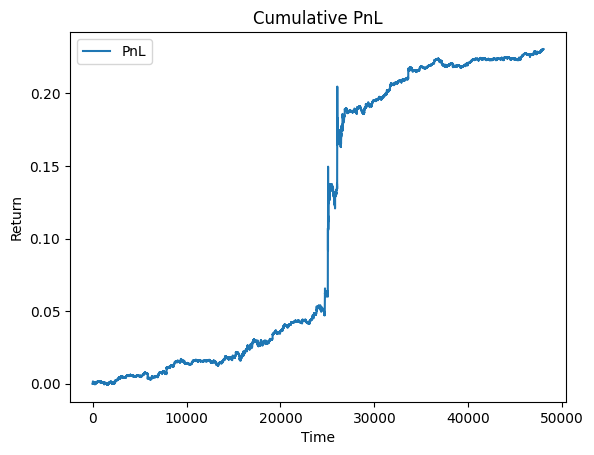

  1%|▏         | 14/1000 [12:42<14:29:35, 52.92s/it]

Sharpe Ratio for the epoch: 6.3521
Average Weights:



Weight
Cash  8.795556e-01
MPWR  1.789262e-02
FICO  1.761620e-02
BKNG  1.332286e-02
GRMN  1.160281e-02
...            ...
DOW   1.875169e-07
AAL   1.723984e-07
BBY   1.662212e-07
ALB   1.593598e-07
TGT   1.409186e-07

[489 rows x 1 columns]

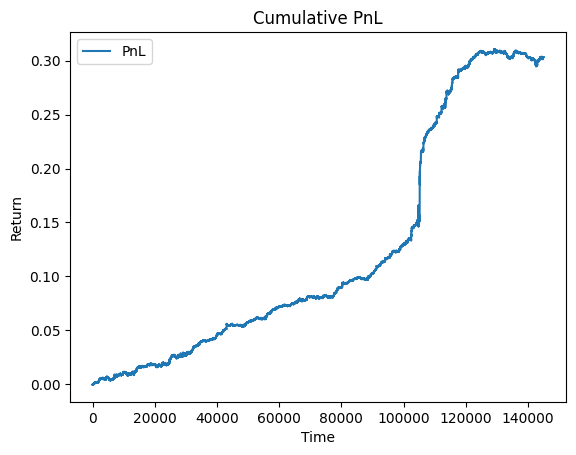

Sharpe Ratio for the epoch: 6.2463
Average Weights:



Weight
Cash  8.314622e-01
FICO  2.676465e-02
BKNG  2.240905e-02
GRMN  1.901542e-02
MPWR  1.733705e-02
...            ...
ROST  2.247376e-07
AAL   2.068354e-07
BBY   1.995103e-07
ALB   1.912160e-07
TGT   1.698427e-07

[489 rows x 1 columns]

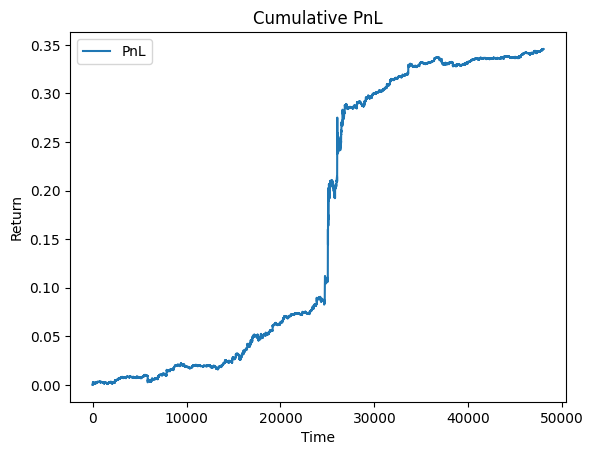

  2%|▏         | 19/1000 [17:18<14:33:38, 53.43s/it]

Sharpe Ratio for the epoch: 6.9430
Average Weights:



Weight
Cash  8.847571e-01
MPWR  1.929102e-02
FICO  1.766179e-02
BKNG  1.188604e-02
GRMN  1.001670e-02
...            ...
ROST  1.011082e-07
AAL   9.441509e-08
BBY   9.166735e-08
ALB   8.947568e-08
TGT   7.652270e-08

[489 rows x 1 columns]

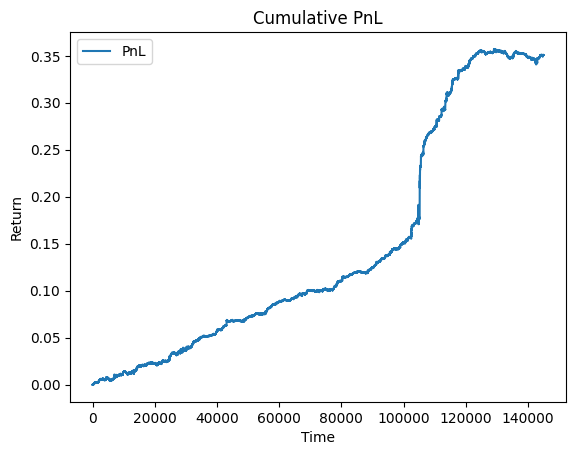

Sharpe Ratio for the epoch: 7.5396
Average Weights:



Weight
Cash  8.410285e-01
FICO  3.135794e-02
MPWR  2.037252e-02
BKNG  1.783137e-02
GRMN  1.670909e-02
...            ...
ROST  1.187223e-07
AAL   1.108854e-07
BBY   1.076410e-07
ALB   1.050911e-07
TGT   9.028320e-08

[489 rows x 1 columns]

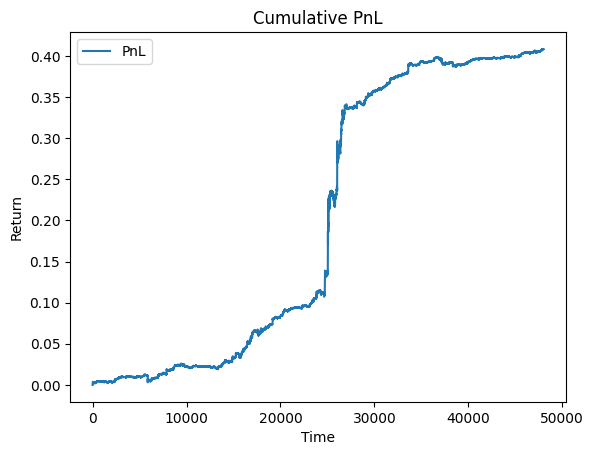

  2%|▏         | 24/1000 [21:28<13:42:40, 50.57s/it]

Sharpe Ratio for the epoch: 7.4194
Average Weights:



Weight
Cash  8.876751e-01
MPWR  2.030637e-02
FICO  1.751550e-02
BKNG  1.132447e-02
MTD   9.807138e-03
...            ...
ROST  6.041139e-08
AAL   5.700912e-08
BBY   5.568264e-08
ALB   5.531800e-08
TGT   4.602648e-08

[489 rows x 1 columns]

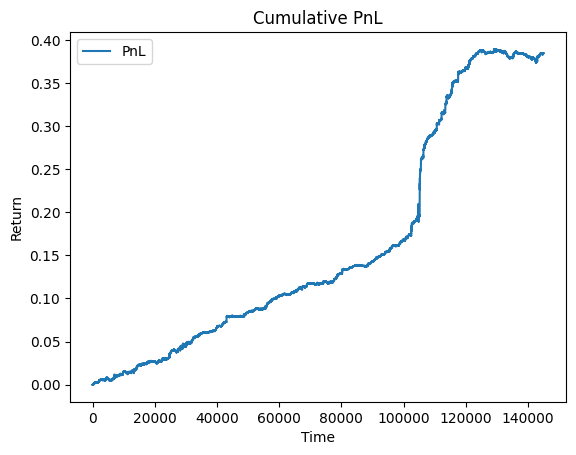

Sharpe Ratio for the epoch: 8.7149
Average Weights:



Weight
Cash  8.502295e-01
FICO  3.236469e-02
MPWR  2.099456e-02
BKNG  1.532042e-02
GRMN  1.342087e-02
...            ...
ROST  6.668294e-08
AAL   6.287848e-08
BBY   6.139994e-08
ALB   6.102133e-08
TGT   5.101226e-08

[489 rows x 1 columns]

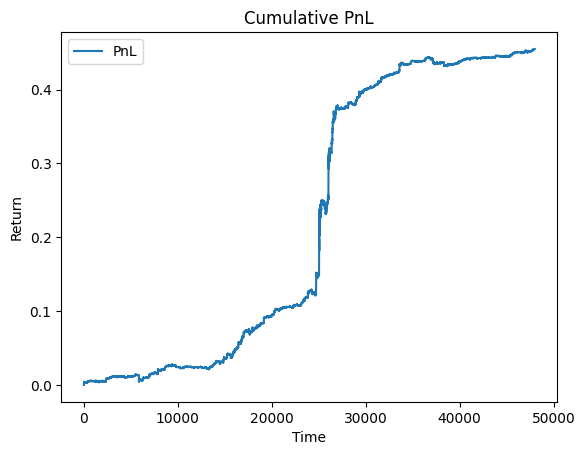

  3%|▎         | 29/1000 [25:32<13:16:59, 49.25s/it]

Sharpe Ratio for the epoch: 7.7681
Average Weights:



Weight
Cash  8.915518e-01
MPWR  2.010916e-02
FICO  1.680006e-02
BKNG  1.063740e-02
MTD   9.874066e-03
...            ...
TEL   3.658224e-08
AAL   3.476906e-08
ALB   3.453066e-08
BBY   3.417048e-08
TGT   2.807071e-08

[489 rows x 1 columns]

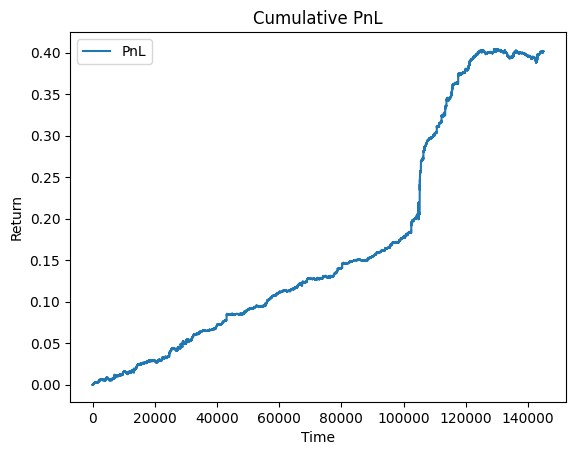

Sharpe Ratio for the epoch: 9.6059
Average Weights:



Weight
Cash  8.496740e-01
FICO  3.175597e-02
MPWR  1.937615e-02
NVR   1.569555e-02
BKNG  1.375848e-02
...            ...
ROST  3.963319e-08
AAL   3.760470e-08
ALB   3.735647e-08
BBY   3.694720e-08
TGT   3.051298e-08

[489 rows x 1 columns]

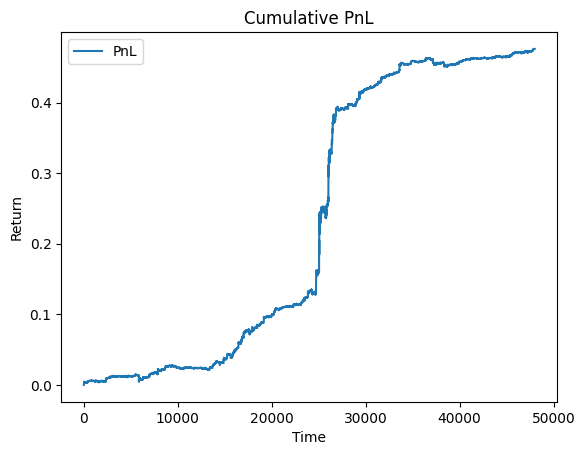

  3%|▎         | 34/1000 [29:44<13:37:31, 50.78s/it]

Sharpe Ratio for the epoch: 8.1556
Average Weights:



Weight
Cash  8.947766e-01
MPWR  2.060871e-02
FICO  1.656370e-02
BKNG  1.039042e-02
MTD   9.869417e-03
...            ...
TEL   2.326912e-08
ALB   2.291079e-08
AAL   2.254938e-08
BBY   2.228485e-08
TGT   1.823467e-08

[489 rows x 1 columns]

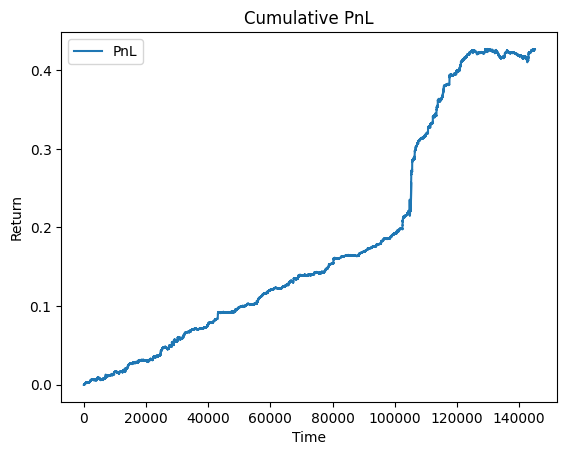

Sharpe Ratio for the epoch: 9.9070
Average Weights:



Weight
Cash  8.516881e-01
FICO  3.196791e-02
MPWR  1.949995e-02
NVR   1.791191e-02
MTD   1.333001e-02
...            ...
TEL   2.518703e-08
ALB   2.475664e-08
AAL   2.436009e-08
BBY   2.406467e-08
TGT   1.979857e-08

[489 rows x 1 columns]

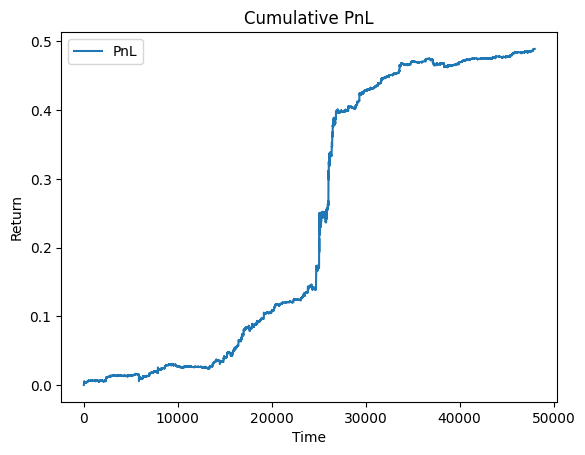

  4%|▍         | 39/1000 [33:55<13:17:22, 49.78s/it]

Sharpe Ratio for the epoch: 8.5319
Average Weights:



Weight
Cash  8.968924e-01
MPWR  2.113988e-02
FICO  1.641060e-02
BKNG  1.024602e-02
MTD   9.837955e-03
...            ...
ALB   1.558222e-08
TEL   1.523568e-08
AAL   1.500222e-08
BBY   1.489399e-08
TGT   1.215029e-08

[489 rows x 1 columns]

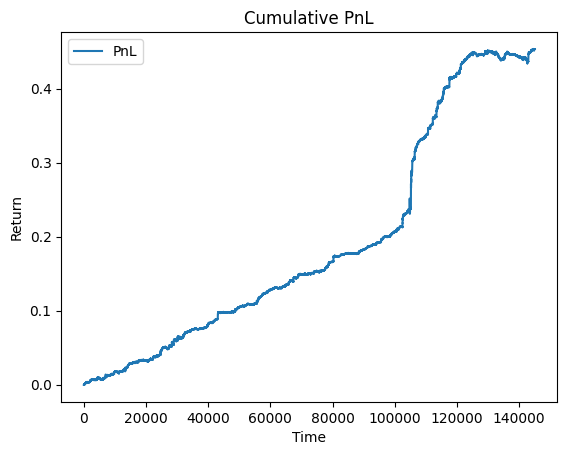

Sharpe Ratio for the epoch: 9.8589
Average Weights:



Weight
Cash  8.514159e-01
FICO  3.177351e-02
MPWR  1.962801e-02
NVR   1.927177e-02
MTD   1.394181e-02
...            ...
ALB   1.690224e-08
TEL   1.655860e-08
AAL   1.627012e-08
BBY   1.614330e-08
TGT   1.324310e-08

[489 rows x 1 columns]

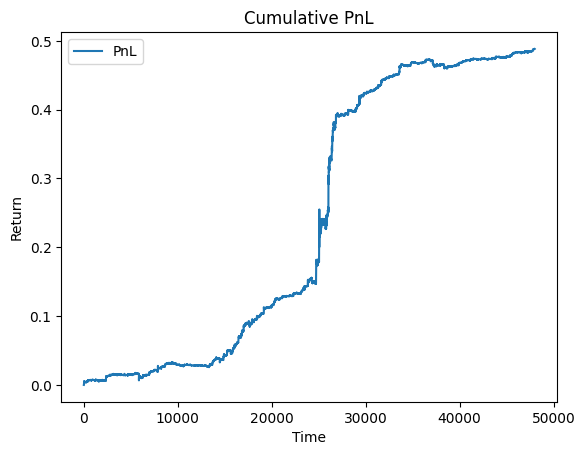

  4%|▍         | 44/1000 [38:14<14:05:41, 53.08s/it]

Sharpe Ratio for the epoch: 8.8593
Average Weights:



Weight
Cash  9.019769e-01
MPWR  2.074553e-02
FICO  1.548000e-02
BKNG  9.640298e-03
MTD   9.364040e-03
...            ...
ROST  9.985168e-09
TEL   9.660570e-09
AAL   9.641002e-09
BBY   9.590846e-09
TGT   7.804212e-09

[489 rows x 1 columns]

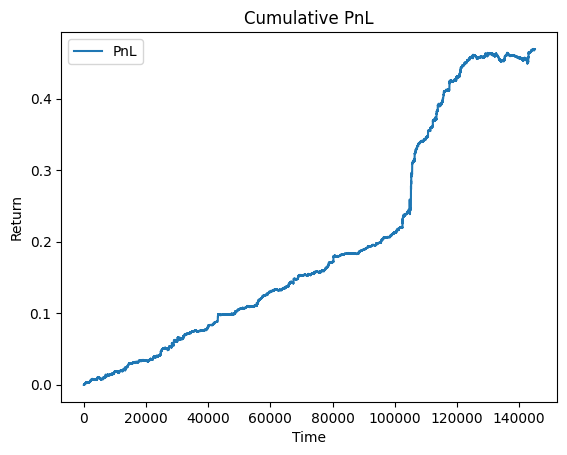

Sharpe Ratio for the epoch: 9.5985
Average Weights:



Weight
Cash  8.550078e-01
FICO  2.904108e-02
NVR   1.858875e-02
MPWR  1.797798e-02
MTD   1.330978e-02
...            ...
ROST  1.069162e-08
TEL   1.034391e-08
AAL   1.030058e-08
BBY   1.023866e-08
TGT   8.378787e-09

[489 rows x 1 columns]

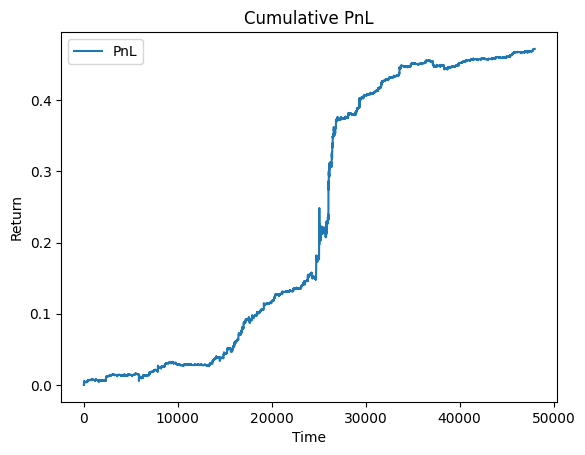

  5%|▍         | 49/1000 [42:57<14:43:26, 55.74s/it]

Sharpe Ratio for the epoch: 9.1883
Average Weights:



Weight
Cash  9.042484e-01
MPWR  2.109516e-02
FICO  1.547168e-02
BKNG  9.474779e-03
MTD   9.321042e-03
...            ...
ROST  6.774624e-09
AAL   6.579916e-09
BBY   6.551089e-09
TEL   6.519588e-09
TGT   5.319593e-09

[489 rows x 1 columns]

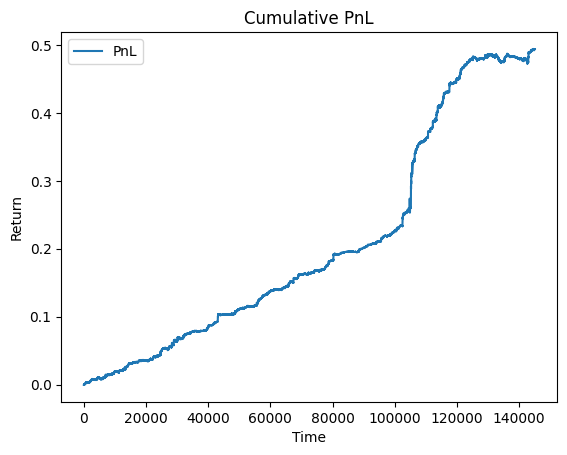

Sharpe Ratio for the epoch: 9.4500
Average Weights:



Weight
Cash  8.587951e-01
FICO  2.842174e-02
NVR   1.924836e-02
MPWR  1.793754e-02
MTD   1.357638e-02
...            ...
ROST  7.173728e-09
AAL   6.950880e-09
BBY   6.914044e-09
TEL   6.902647e-09
TGT   5.647272e-09

[489 rows x 1 columns]

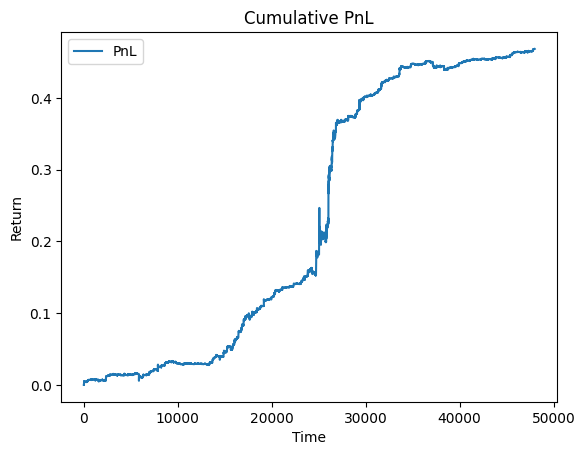

  5%|▌         | 54/1000 [47:25<13:55:34, 53.00s/it]

Sharpe Ratio for the epoch: 9.4869
Average Weights:



Weight
Cash  9.050158e-01
MPWR  2.159953e-02
FICO  1.576246e-02
BKNG  9.420890e-03
MTD   9.390021e-03
...            ...
ROST  4.694811e-09
AAL   4.585155e-09
BBY   4.567382e-09
TEL   4.499120e-09
TGT   3.702775e-09

[489 rows x 1 columns]

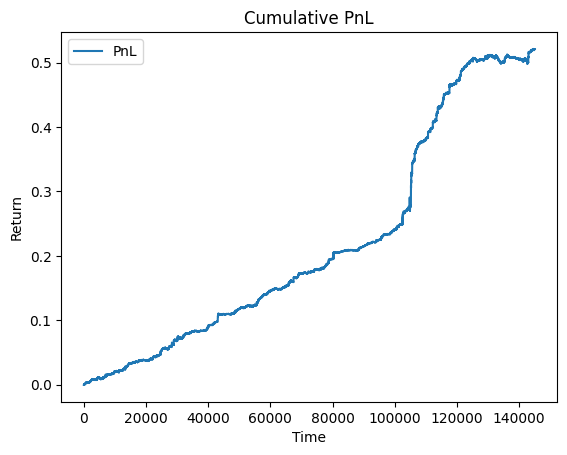

Sharpe Ratio for the epoch: 9.3594
Average Weights:



Weight
Cash  8.599386e-01
FICO  2.846914e-02
NVR   2.029693e-02
MPWR  1.814207e-02
MTD   1.396161e-02
...            ...
ROST  4.923056e-09
AAL   4.795666e-09
BBY   4.772437e-09
TEL   4.716719e-09
TGT   3.892406e-09

[489 rows x 1 columns]

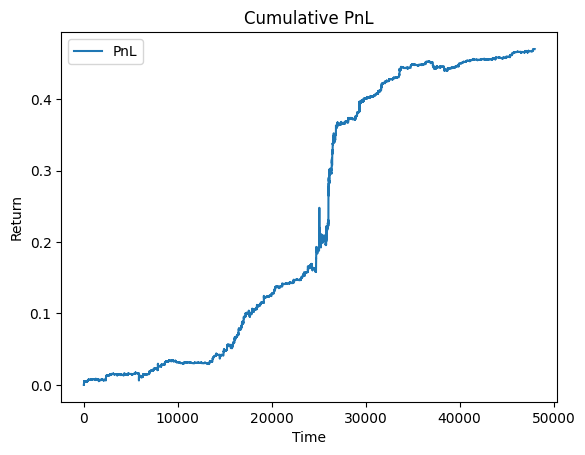

  6%|▌         | 59/1000 [51:25<12:45:35, 48.82s/it]

Sharpe Ratio for the epoch: 9.7485
Average Weights:



Weight
Cash  9.054359e-01
MPWR  2.202480e-02
FICO  1.607070e-02
MTD   9.437479e-03
BKNG  9.369798e-03
...            ...
ROST  3.264444e-09
AAL   3.205365e-09
BBY   3.194226e-09
TEL   3.118648e-09
TGT   2.586139e-09

[489 rows x 1 columns]

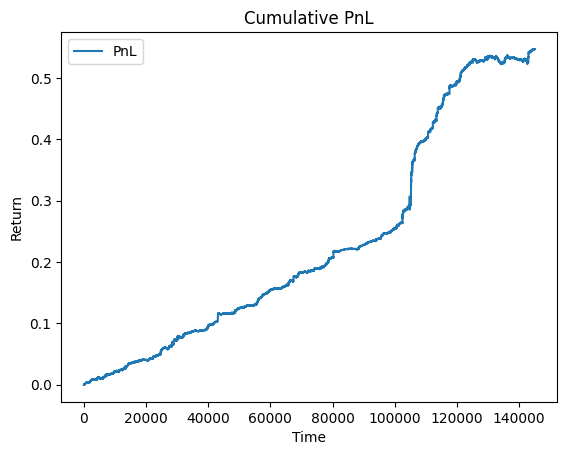

Sharpe Ratio for the epoch: 9.3003
Average Weights:



Weight
Cash  8.603919e-01
FICO  2.860652e-02
NVR   2.130463e-02
MPWR  1.830566e-02
MTD   1.428237e-02
...            ...
ROST  3.392574e-09
AAL   3.321946e-09
BBY   3.307111e-09
TEL   3.240069e-09
TGT   2.694207e-09

[489 rows x 1 columns]

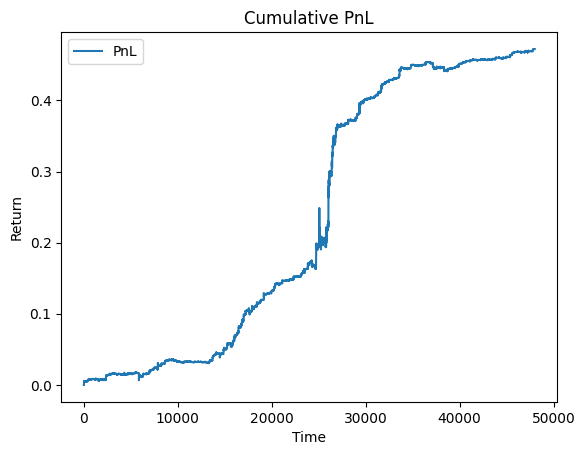

  6%|▋         | 64/1000 [56:01<14:02:08, 53.98s/it]

Sharpe Ratio for the epoch: 9.9895
Average Weights:



Weight
Cash  9.057389e-01
MPWR  2.234324e-02
FICO  1.634044e-02
MTD   9.454221e-03
BKNG  9.304253e-03
...            ...
ROST  2.267198e-09
AAL   2.238061e-09
BBY   2.230851e-09
TEL   2.161310e-09
TGT   1.803963e-09

[489 rows x 1 columns]

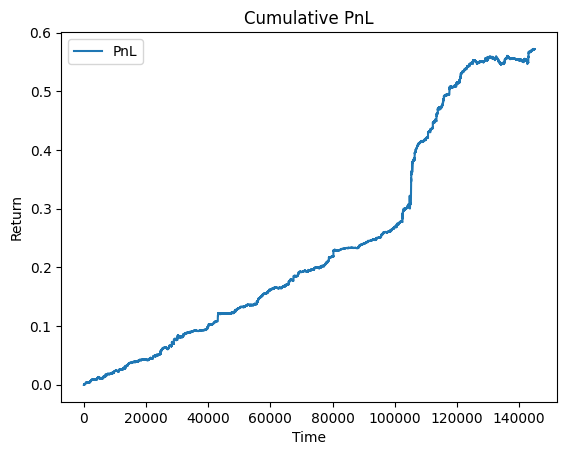

Sharpe Ratio for the epoch: 9.2635
Average Weights:



Weight
Cash  8.608458e-01
FICO  2.868631e-02
NVR   2.208517e-02
MPWR  1.831590e-02
MTD   1.447990e-02
...            ...
ROST  2.332181e-09
AAL   2.295387e-09
BBY   2.285717e-09
TEL   2.222476e-09
TGT   1.860180e-09

[489 rows x 1 columns]

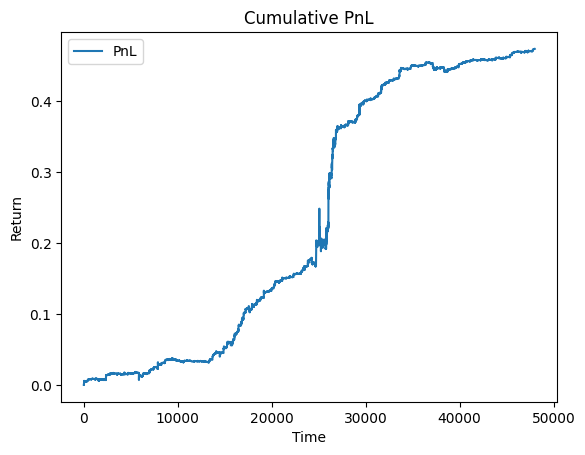

  7%|▋         | 69/1000 [1:00:27<13:34:32, 52.50s/it]

Sharpe Ratio for the epoch: 10.2033
Average Weights:



Weight
Cash  9.064252e-01
MPWR  2.249958e-02
FICO  1.650170e-02
MTD   9.403318e-03
BKNG  9.204429e-03
...            ...
ROST  1.564757e-09
AAL   1.553198e-09
BBY   1.548165e-09
TEL   1.489919e-09
TGT   1.250440e-09

[489 rows x 1 columns]

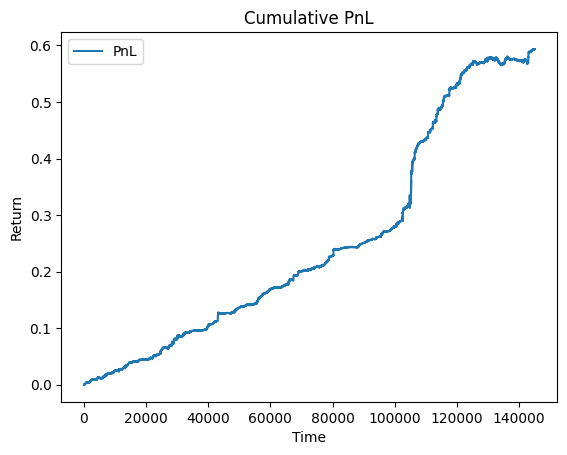

Sharpe Ratio for the epoch: 9.2476
Average Weights:



Weight
Cash  8.616781e-01
FICO  2.869578e-02
NVR   2.256871e-02
MPWR  1.814568e-02
MTD   1.454294e-02
...            ...
ROST  1.595794e-09
AAL   1.579001e-09
BBY   1.572313e-09
TEL   1.518888e-09
TGT   1.278342e-09

[489 rows x 1 columns]

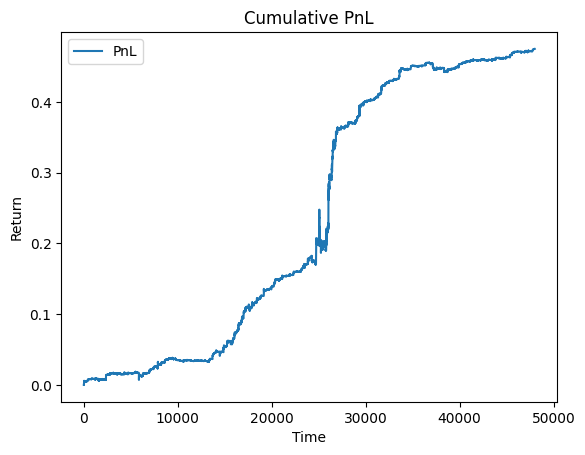

  7%|▋         | 74/1000 [1:04:34<12:44:27, 49.53s/it]

Sharpe Ratio for the epoch: 10.4085
Average Weights:



Weight
Cash  9.071833e-01
MPWR  2.262662e-02
FICO  1.661324e-02
MTD   9.342618e-03
BKNG  9.104361e-03
...            ...
ROST  1.078324e-09
AAL   1.076573e-09
BBY   1.072769e-09
TEL   1.026372e-09
TGT   8.654570e-10

[489 rows x 1 columns]

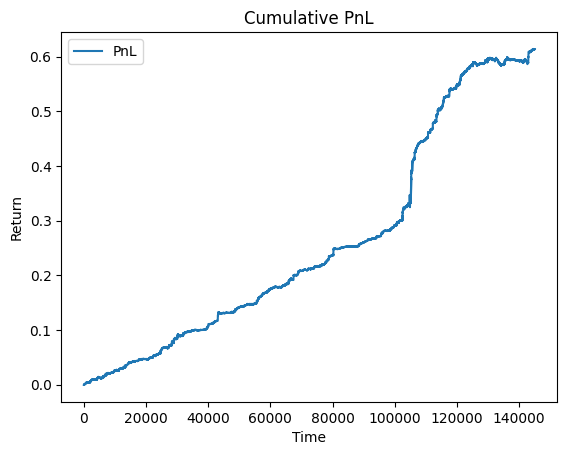

Sharpe Ratio for the epoch: 9.2529
Average Weights:



Weight
Cash  8.625026e-01
FICO  2.863290e-02
NVR   2.285438e-02
MPWR  1.795212e-02
MTD   1.454356e-02
...            ...
ROST  1.092266e-09
AAL   1.086831e-09
BBY   1.081923e-09
TEL   1.039209e-09
TGT   8.787857e-10

[489 rows x 1 columns]

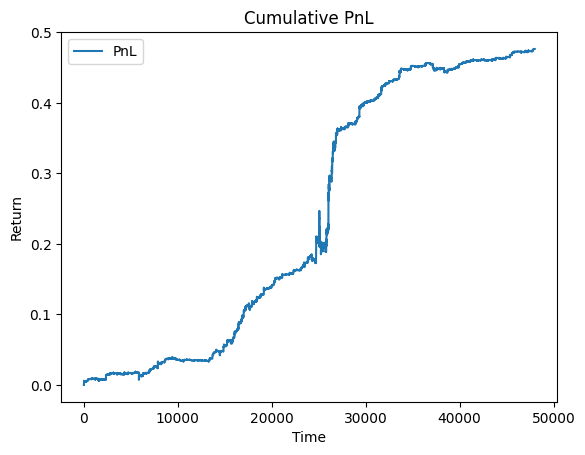

  8%|▊         | 79/1000 [1:08:52<13:07:13, 51.29s/it]

Sharpe Ratio for the epoch: 10.6384
Average Weights:



Weight
Cash  9.075526e-01
MPWR  2.258011e-02
FICO  1.654828e-02
MTD   9.225757e-03
BKNG  8.971975e-03
...            ...
AAL   7.415306e-10
BBY   7.385472e-10
ROST  7.383026e-10
TEL   7.029226e-10
TGT   5.951736e-10

[489 rows x 1 columns]

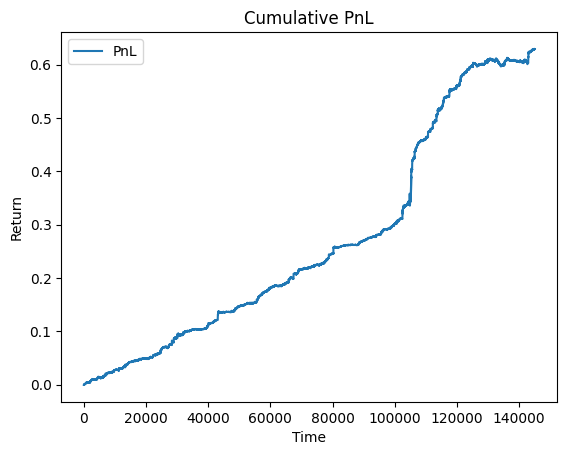

Sharpe Ratio for the epoch: 9.2353
Average Weights:



Weight
Cash  8.647432e-01
FICO  2.744781e-02
NVR   2.242232e-02
MPWR  1.823833e-02
MTD   1.425842e-02
...            ...
AAL   7.338966e-10
ROST  7.333410e-10
BBY   7.302581e-10
TEL   6.978855e-10
TGT   5.926420e-10

[489 rows x 1 columns]

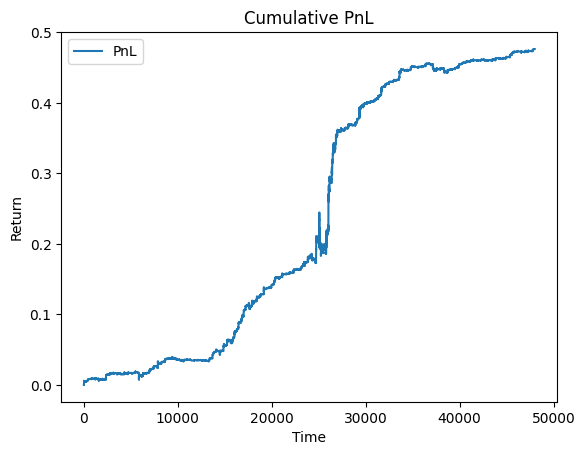

  8%|▊         | 84/1000 [1:12:54<12:24:43, 48.78s/it]

Sharpe Ratio for the epoch: 11.0003
Average Weights:



Weight
Cash  9.086037e-01
MPWR  2.231029e-02
FICO  1.640012e-02
MTD   9.049617e-03
BKNG  8.813633e-03
...            ...
AAL   5.060801e-10
BBY   5.037061e-10
ROST  5.008977e-10
TEL   4.772980e-10
TGT   4.056262e-10

[489 rows x 1 columns]

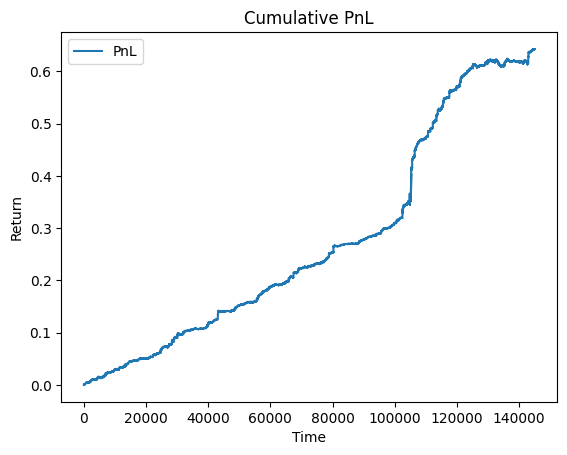

Sharpe Ratio for the epoch: 9.1505
Average Weights:



Weight
Cash  8.647770e-01
FICO  2.659760e-02
NVR   2.118628e-02
MPWR  1.752066e-02
ESS   1.406107e-02
...            ...
AAL   5.030434e-10
BBY   5.002197e-10
ROST  4.997764e-10
TEL   4.760216e-10
TGT   4.057127e-10

[489 rows x 1 columns]

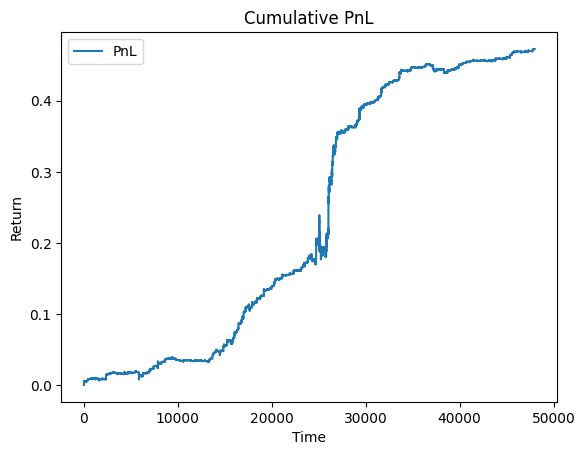

  9%|▉         | 89/1000 [1:16:55<12:11:39, 48.19s/it]

Sharpe Ratio for the epoch: 11.2862
Average Weights:



Weight
Cash  9.093639e-01
MPWR  2.241256e-02
FICO  1.637050e-02
MTD   8.972445e-03
BKNG  8.705905e-03
...            ...
AAL   3.509900e-10
BBY   3.488500e-10
ROST  3.452188e-10
TEL   3.294719e-10
TGT   2.807531e-10

[489 rows x 1 columns]

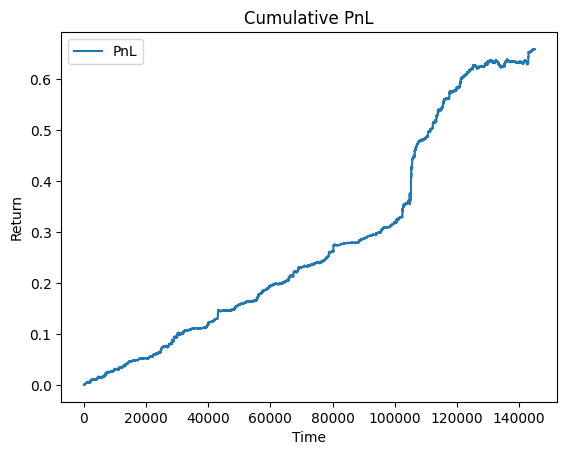

Sharpe Ratio for the epoch: 9.1155
Average Weights:



Weight
Cash  8.658175e-01
FICO  2.613456e-02
NVR   2.117512e-02
MPWR  1.715126e-02
ESS   1.384805e-02
...            ...
AAL   3.468750e-10
BBY   3.444488e-10
ROST  3.425233e-10
TEL   3.267417e-10
TGT   2.792409e-10

[489 rows x 1 columns]

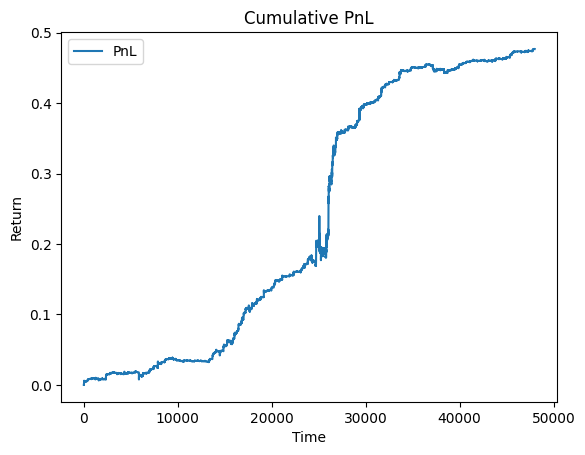

  9%|▉         | 94/1000 [1:20:56<12:05:48, 48.07s/it]

Sharpe Ratio for the epoch: 11.5482
Average Weights:



Weight
Cash  9.098231e-01
MPWR  2.257473e-02
FICO  1.637524e-02
MTD   8.925737e-03
BKNG  8.609840e-03
...            ...
BBY   2.423222e-10
ROST  2.386580e-10
MCD   2.382185e-10
TEL   2.281437e-10
TGT   1.948773e-10

[489 rows x 1 columns]

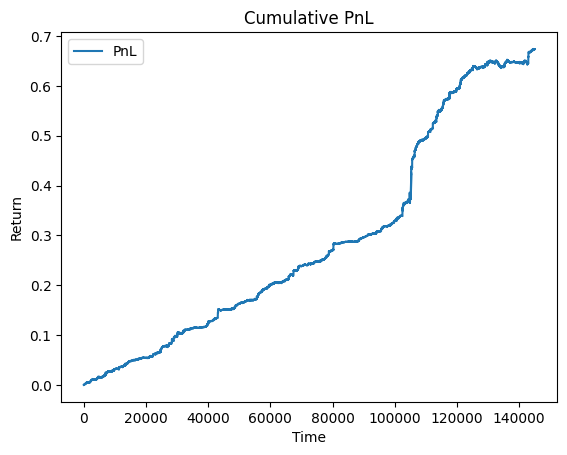

Sharpe Ratio for the epoch: 9.0949
Average Weights:



Weight
Cash  8.667733e-01
FICO  2.574445e-02
NVR   2.120551e-02
MPWR  1.696701e-02
MTD   1.373237e-02
...            ...
BBY   2.375201e-10
ROST  2.351001e-10
MCD   2.347306e-10
TEL   2.246211e-10
TGT   1.924363e-10

[489 rows x 1 columns]

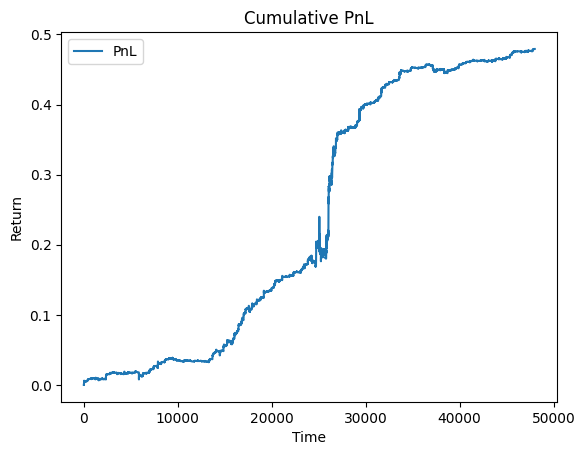

 10%|▉         | 99/1000 [1:25:11<12:38:40, 50.52s/it]

Sharpe Ratio for the epoch: 11.7843
Average Weights:



Weight
Cash  9.100999e-01
MPWR  2.277529e-02
FICO  1.638972e-02
MTD   8.903551e-03
BKNG  8.515728e-03
...            ...
BBY   1.685298e-10
ROST  1.652056e-10
MCD   1.616103e-10
TEL   1.581973e-10
TGT   1.354146e-10

[489 rows x 1 columns]

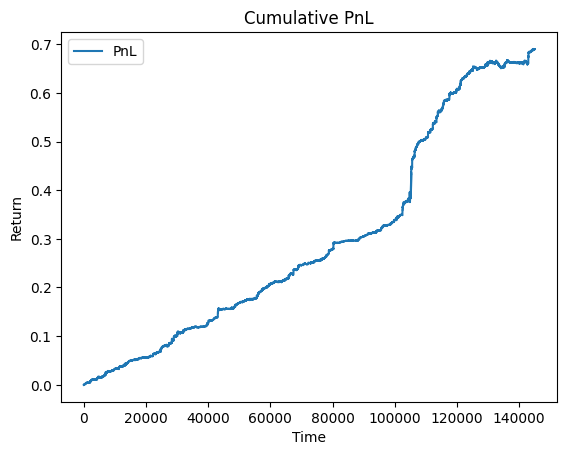

Sharpe Ratio for the epoch: 9.0831
Average Weights:



Weight
Cash  8.678146e-01
FICO  2.539183e-02
NVR   2.117405e-02
MPWR  1.678102e-02
MTD   1.371371e-02
...            ...
BBY   1.636772e-10
ROST  1.612730e-10
MCD   1.577816e-10
TEL   1.543408e-10
TGT   1.325067e-10

[489 rows x 1 columns]

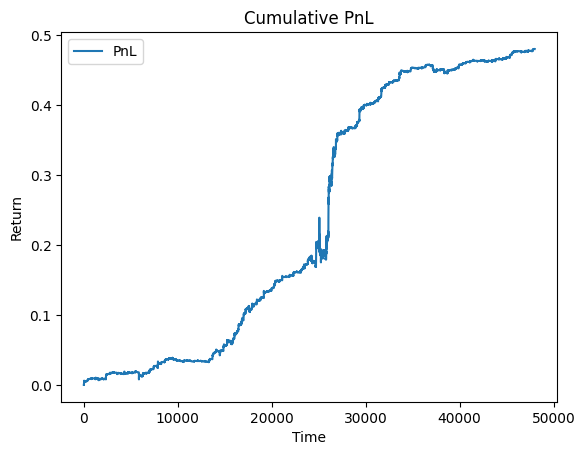

 10%|█         | 104/1000 [1:29:17<12:14:42, 49.20s/it]

Sharpe Ratio for the epoch: 11.9997
Average Weights:



Weight
Cash  9.103321e-01
MPWR  2.294838e-02
FICO  1.639415e-02
MTD   8.894159e-03
BKNG  8.422217e-03
...            ...
BBY   1.172000e-10
ROST  1.143754e-10
MCD   1.098372e-10
TEL   1.097180e-10
TGT   9.407521e-11

[489 rows x 1 columns]

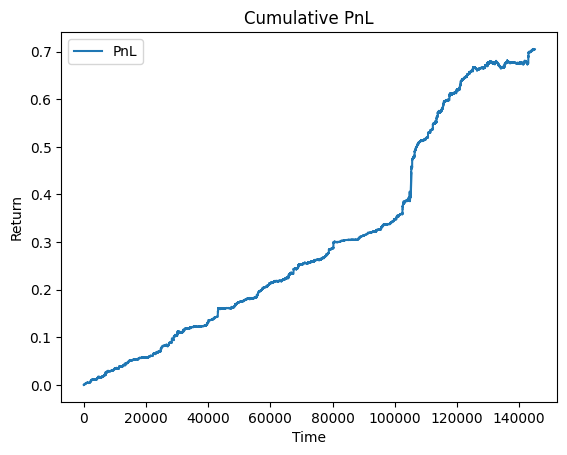

Sharpe Ratio for the epoch: 9.0751
Average Weights:



Weight
Cash  8.688287e-01
FICO  2.506393e-02
NVR   2.113675e-02
MPWR  1.661504e-02
MTD   1.369686e-02
...            ...
BBY   1.128077e-10
ROST  1.106675e-10
MCD   1.062735e-10
TEL   1.060953e-10
TGT   9.124049e-11

[489 rows x 1 columns]

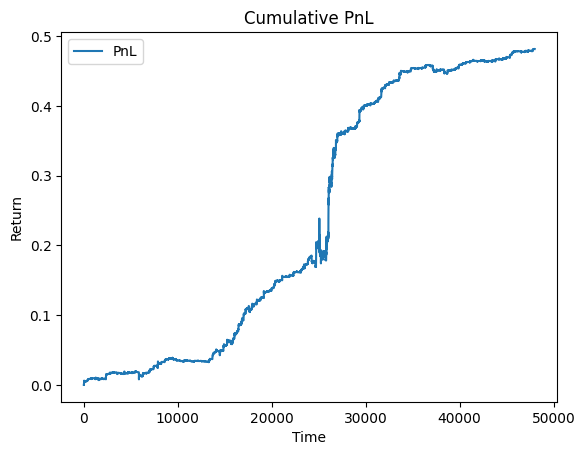

 11%|█         | 109/1000 [1:33:17<11:53:58, 48.08s/it]

Sharpe Ratio for the epoch: 12.1967
Average Weights:



Weight
Cash  9.103873e-01
MPWR  2.313698e-02
FICO  1.642838e-02
MTD   8.906876e-03
BKNG  8.345730e-03
...            ...
BBY   8.160125e-11
ROST  7.927985e-11
TEL   7.619402e-11
MCD   7.489141e-11
TGT   6.542832e-11

[489 rows x 1 columns]

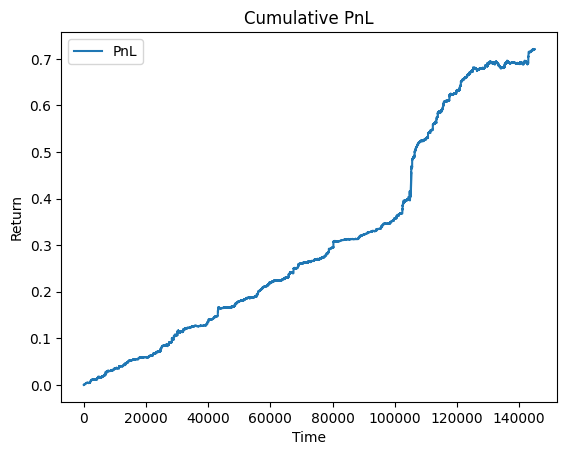

Sharpe Ratio for the epoch: 9.0743
Average Weights:



Weight
Cash  8.695481e-01
FICO  2.484743e-02
NVR   2.112004e-02
MPWR  1.647921e-02
MTD   1.370954e-02
...            ...
BBY   7.792008e-11
ROST  7.610796e-11
TEL   7.309821e-11
MCD   7.188634e-11
TGT   6.295732e-11

[489 rows x 1 columns]

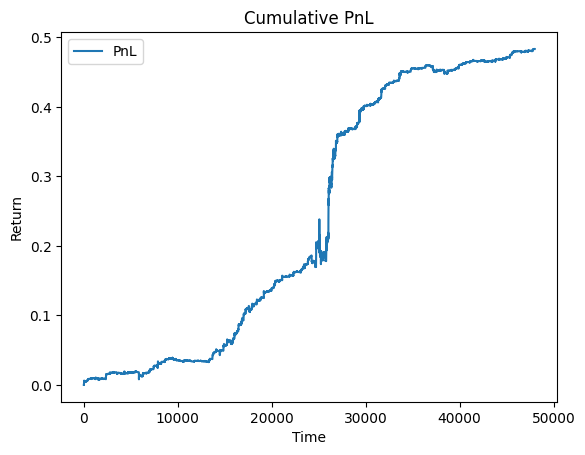

 11%|█▏        | 114/1000 [1:37:18<11:50:03, 48.09s/it]

Sharpe Ratio for the epoch: 12.3798
Average Weights:



Weight
Cash  9.104095e-01
MPWR  2.330239e-02
FICO  1.646563e-02
MTD   8.926959e-03
BKNG  8.275098e-03
...            ...
BBY   5.682024e-11
ROST  5.496680e-11
TEL   5.292868e-11
MCD   5.116671e-11
TGT   4.550696e-11

[489 rows x 1 columns]

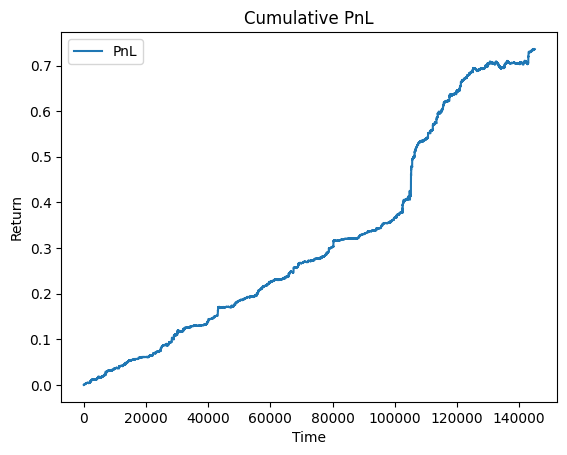

Sharpe Ratio for the epoch: 9.0691
Average Weights:



Weight
Cash  8.703372e-01
FICO  2.463874e-02
NVR   2.107436e-02
MPWR  1.630145e-02
MTD   1.370476e-02
...            ...
BBY   5.378079e-11
ROST  5.231029e-11
TEL   5.033616e-11
MCD   4.868171e-11
TGT   4.340721e-11

[489 rows x 1 columns]

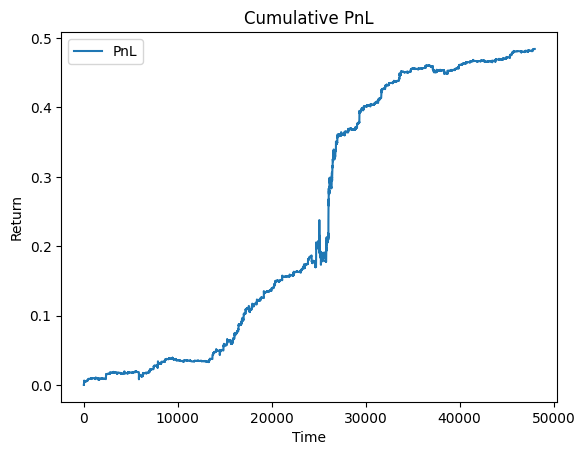

 12%|█▏        | 119/1000 [1:41:19<11:47:50, 48.21s/it]

Sharpe Ratio for the epoch: 12.5493
Average Weights:



Weight
Cash  9.105006e-01
MPWR  2.342689e-02
FICO  1.648408e-02
MTD   8.941501e-03
BKNG  8.203797e-03
...            ...
BBY   3.953179e-11
ROST  3.808578e-11
TEL   3.674716e-11
MCD   3.499901e-11
TGT   3.162714e-11

[489 rows x 1 columns]

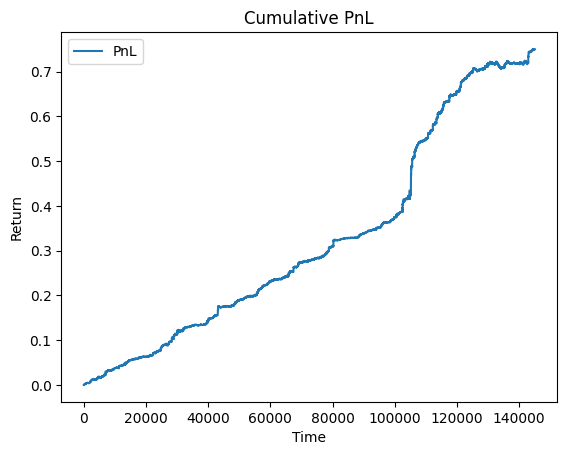

Sharpe Ratio for the epoch: 9.0617
Average Weights:



Weight
Cash  8.712564e-01
FICO  2.440991e-02
NVR   2.099102e-02
MPWR  1.610226e-02
MTD   1.367547e-02
...            ...
BBY   3.707568e-11
ROST  3.591761e-11
TEL   3.463089e-11
MCD   3.299483e-11
TGT   2.989465e-11

[489 rows x 1 columns]

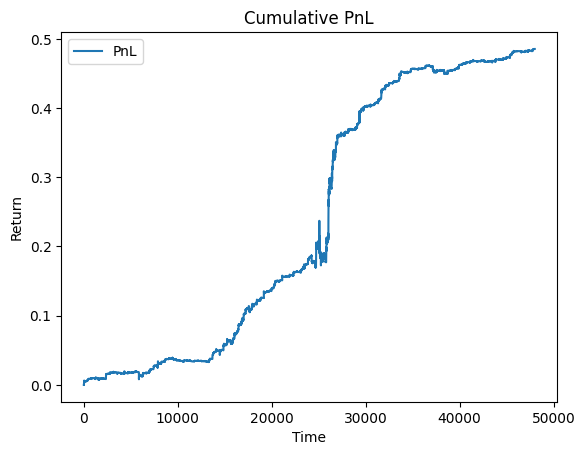

 12%|█▏        | 124/1000 [1:45:19<11:42:03, 48.09s/it]

Sharpe Ratio for the epoch: 12.7075
Average Weights:



Weight
Cash  9.105828e-01
MPWR  2.353894e-02
FICO  1.648878e-02
MTD   8.960270e-03
BKNG  8.133507e-03
...            ...
BBY   2.751202e-11
ROST  2.640440e-11
TEL   2.552902e-11
MCD   2.399765e-11
TGT   2.199228e-11

[489 rows x 1 columns]

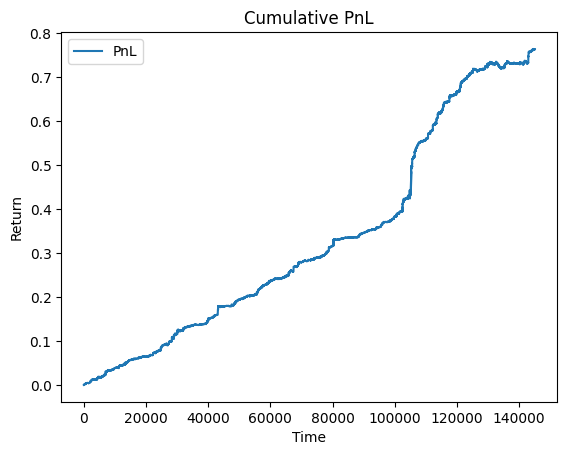

Sharpe Ratio for the epoch: 9.0543
Average Weights:



Weight
Cash  8.721482e-01
FICO  2.417943e-02
NVR   2.091029e-02
MPWR  1.587975e-02
MTD   1.364602e-02
...            ...
BBY   2.557672e-11
ROST  2.468557e-11
TEL   2.384987e-11
MCD   2.242517e-11
TGT   2.060713e-11

[489 rows x 1 columns]

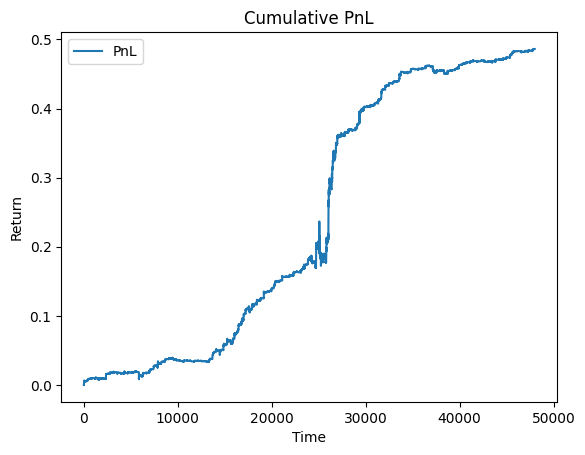

 13%|█▎        | 129/1000 [1:49:20<11:38:03, 48.09s/it]

Sharpe Ratio for the epoch: 12.8593
Average Weights:



Weight
Cash  9.106761e-01
MPWR  2.361828e-02
FICO  1.649985e-02
MTD   8.981950e-03
BKNG  8.064687e-03
...            ...
MO    1.910378e-11
ROST  1.832131e-11
TEL   1.775271e-11
MCD   1.649988e-11
TGT   1.530719e-11

[489 rows x 1 columns]

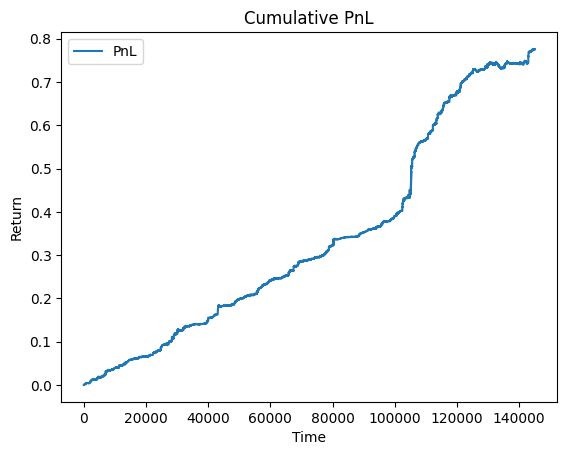

Sharpe Ratio for the epoch: 9.0557
Average Weights:



Weight
Cash  8.727667e-01
FICO  2.406330e-02
NVR   2.085201e-02
MPWR  1.570329e-02
MTD   1.363801e-02
...            ...
BBY   1.769452e-11
ROST  1.701933e-11
TEL   1.647878e-11
MCD   1.531908e-11
TGT   1.425132e-11

[489 rows x 1 columns]

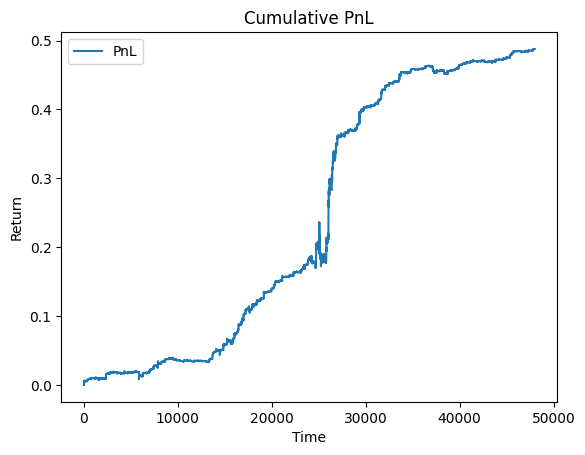

 13%|█▎        | 134/1000 [1:53:21<11:34:39, 48.13s/it]

Sharpe Ratio for the epoch: 13.0073
Average Weights:



Weight
Cash  9.106870e-01
MPWR  2.370154e-02
FICO  1.652248e-02
MTD   9.012077e-03
BKNG  8.015090e-03
...            ...
MO    1.318709e-11
ROST  1.274525e-11
TEL   1.237861e-11
MCD   1.139687e-11
TGT   1.068439e-11

[489 rows x 1 columns]

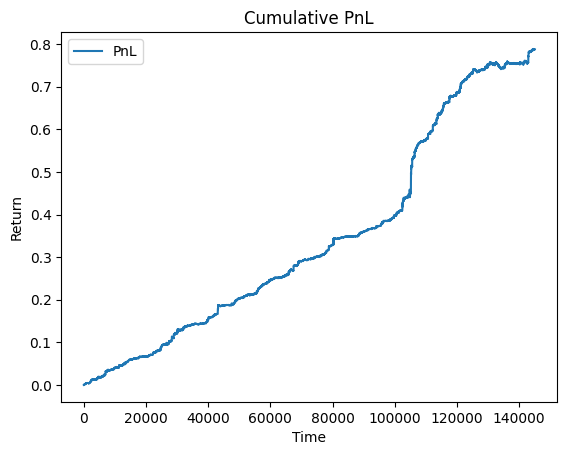

Sharpe Ratio for the epoch: 9.0589
Average Weights:



Weight
Cash  8.732764e-01
FICO  2.397383e-02
NVR   2.080504e-02
MPWR  1.551979e-02
MTD   1.363978e-02
...            ...
MO    1.220826e-11
ROST  1.176783e-11
TEL   1.142063e-11
MCD   1.051681e-11
TGT   9.887251e-12

[489 rows x 1 columns]

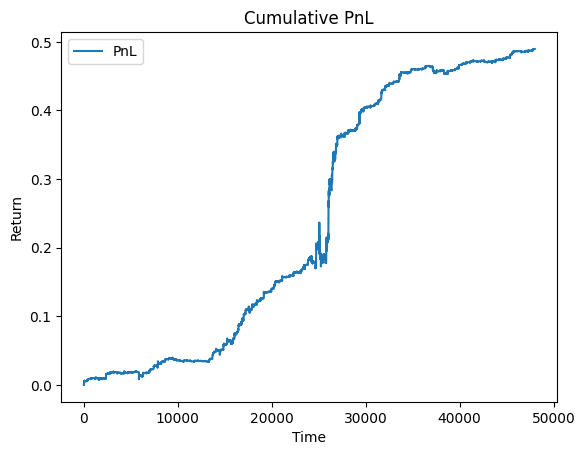

 14%|█▍        | 139/1000 [1:57:22<11:29:39, 48.06s/it]

Sharpe Ratio for the epoch: 13.1507
Average Weights:



Weight
Cash  9.107075e-01
MPWR  2.376983e-02
FICO  1.653936e-02
MTD   9.044042e-03
BKNG  7.967808e-03
...            ...
MO    9.138542e-12
ROST  8.886743e-12
TEL   8.653194e-12
MCD   7.908286e-12
TGT   7.478180e-12

[489 rows x 1 columns]

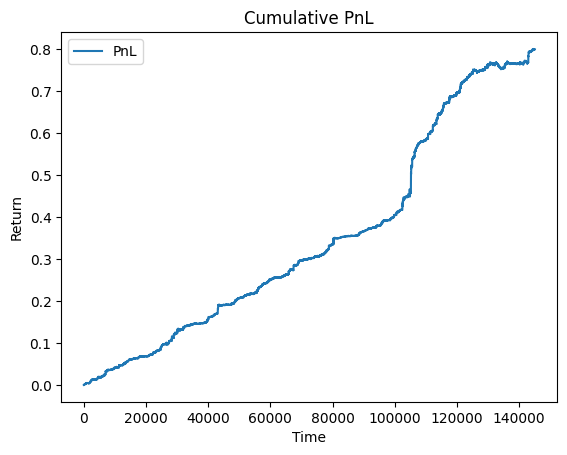

Sharpe Ratio for the epoch: 9.0628
Average Weights:



Weight
Cash  8.737497e-01
FICO  2.389100e-02
NVR   2.074300e-02
MPWR  1.533829e-02
MTD   1.363382e-02
...            ...
MO    8.411099e-12
ROST  8.158639e-12
TEL   7.938154e-12
MCD   7.256027e-12
TGT   6.881123e-12

[489 rows x 1 columns]

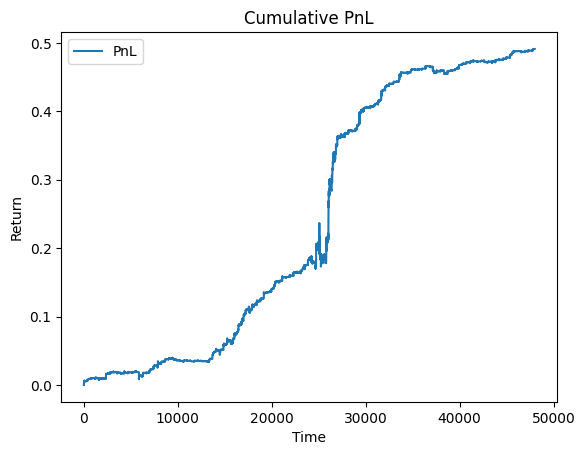

 14%|█▍        | 144/1000 [2:01:23<11:26:57, 48.15s/it]

Sharpe Ratio for the epoch: 13.2865
Average Weights:



Weight
Cash  9.106503e-01
MPWR  2.385443e-02
FICO  1.657365e-02
MTD   9.087620e-03
BKNG  7.930065e-03
...            ...
MO    6.371293e-12
ROST  6.223291e-12
TEL   6.076513e-12
MCD   5.525188e-12
TGT   5.259837e-12

[489 rows x 1 columns]

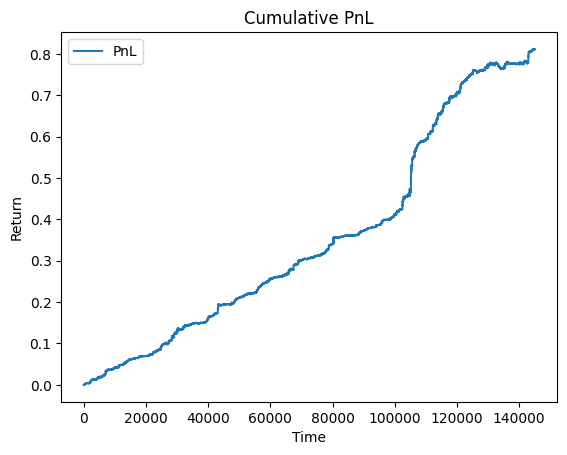

Sharpe Ratio for the epoch: 9.0800
Average Weights:



Weight
Cash  8.736803e-01
FICO  2.393566e-02
NVR   2.074976e-02
MPWR  1.526291e-02
MTD   1.371301e-02
...            ...
MO    5.855951e-12
ROST  5.705854e-12
TEL   5.566990e-12
MCD   5.062976e-12
TGT   4.833640e-12

[489 rows x 1 columns]

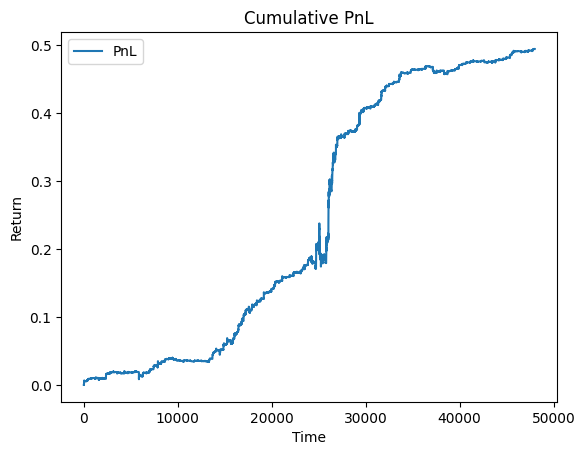

 15%|█▍        | 149/1000 [2:05:24<11:21:47, 48.07s/it]

Sharpe Ratio for the epoch: 13.4184
Average Weights:



Weight
Cash  9.107362e-01
MPWR  2.388876e-02
FICO  1.657668e-02
MTD   9.115425e-03
BKNG  7.883333e-03
...            ...
MO    4.465501e-12
ROST  4.372693e-12
TEL   4.282581e-12
MCD   3.884238e-12
TGT   3.715138e-12

[489 rows x 1 columns]

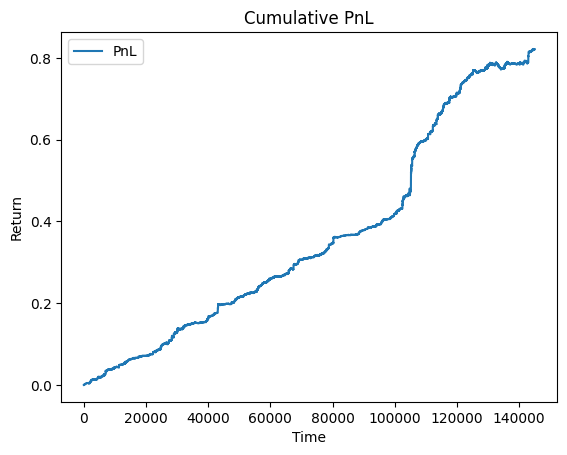

Sharpe Ratio for the epoch: 9.0948
Average Weights:



Weight
Cash  8.739130e-01
FICO  2.394331e-02
NVR   2.071797e-02
MPWR  1.511786e-02
MTD   1.373572e-02
...            ...
MO    4.092860e-12
ROST  3.998206e-12
TEL   3.912810e-12
MCD   3.549833e-12
TGT   3.405025e-12

[489 rows x 1 columns]

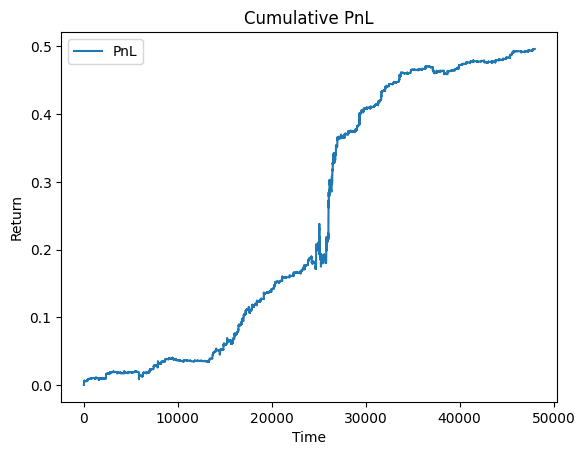

 15%|█▌        | 154/1000 [2:09:24<11:16:43, 47.99s/it]

Sharpe Ratio for the epoch: 13.5478
Average Weights:



Weight
Cash  9.108126e-01
MPWR  2.391896e-02
FICO  1.658617e-02
MTD   9.144080e-03
BKNG  7.837287e-03
...            ...
MO    3.157404e-12
ROST  3.092962e-12
TEL   3.039525e-12
MCD   2.758105e-12
TGT   2.644657e-12

[489 rows x 1 columns]

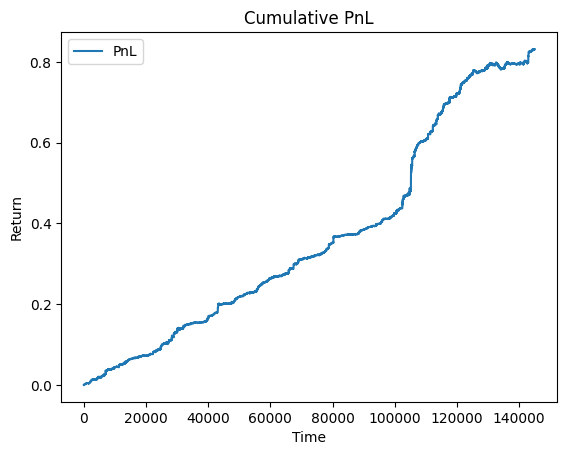

Sharpe Ratio for the epoch: 9.1094
Average Weights:



Weight
Cash  8.741756e-01
FICO  2.394793e-02
NVR   2.067707e-02
MPWR  1.496259e-02
MTD   1.374185e-02
...            ...
MO    2.885273e-12
ROST  2.819807e-12
TEL   2.769020e-12
MCD   2.513520e-12
TGT   2.417015e-12

[489 rows x 1 columns]

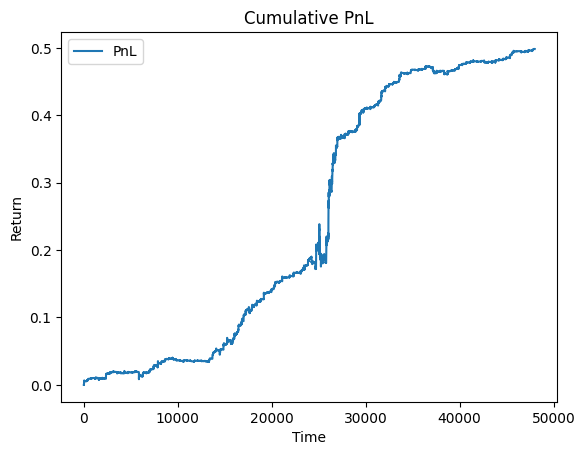

 16%|█▌        | 159/1000 [2:13:25<11:13:16, 48.03s/it]

Sharpe Ratio for the epoch: 13.6732
Average Weights:



Weight
Cash  9.109510e-01
MPWR  2.392432e-02
FICO  1.658884e-02
MTD   9.171690e-03
BKNG  7.776711e-03
...            ...
MO    2.255673e-12
ROST  2.205308e-12
TEL   2.175690e-12
MCD   1.981346e-12
TGT   1.900276e-12

[489 rows x 1 columns]

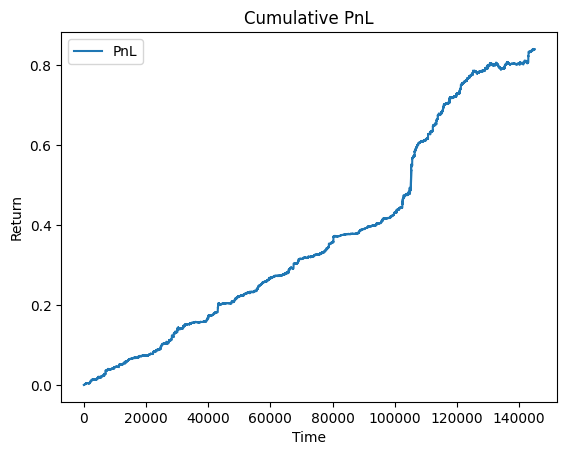

Sharpe Ratio for the epoch: 9.1268
Average Weights:



Weight
Cash  8.745944e-01
FICO  2.392658e-02
NVR   2.059636e-02
MPWR  1.479308e-02
MTD   1.373443e-02
...            ...
MO    2.053655e-12
ROST  2.003243e-12
TEL   1.974902e-12
MCD   1.799266e-12
TGT   1.730581e-12

[489 rows x 1 columns]

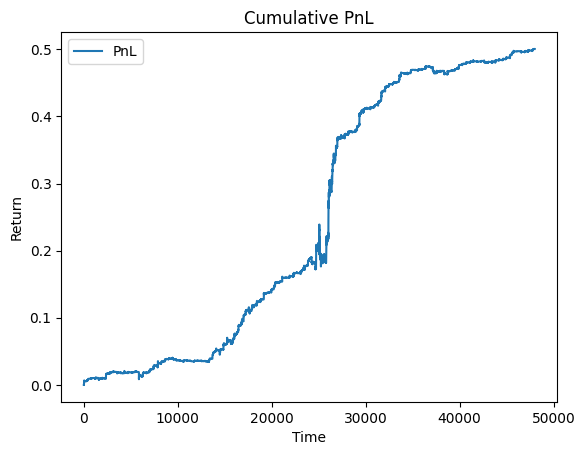

 16%|█▋        | 164/1000 [2:17:27<11:11:39, 48.20s/it]

Sharpe Ratio for the epoch: 13.7947
Average Weights:



Weight
Cash  9.110279e-01
MPWR  2.393467e-02
FICO  1.659713e-02
MTD   9.206902e-03
BKNG  7.736993e-03
...            ...
MO    1.634589e-12
ROST  1.591040e-12
TEL   1.576726e-12
MCD   1.445787e-12
TGT   1.383701e-12

[489 rows x 1 columns]

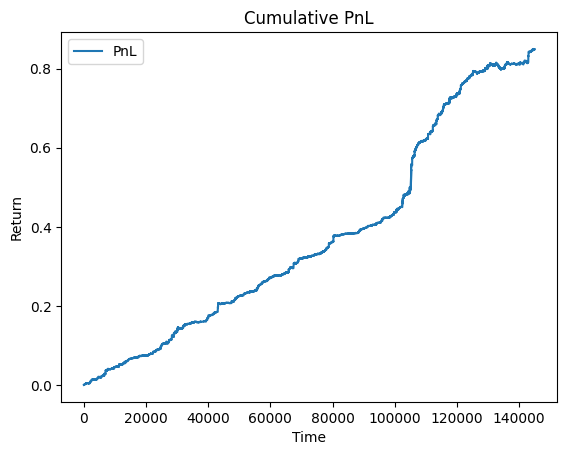

Sharpe Ratio for the epoch: 9.1481
Average Weights:



Weight
Cash  8.748495e-01
FICO  2.393501e-02
NVR   2.053320e-02
MPWR  1.463952e-02
MTD   1.374347e-02
...            ...
MO    1.484397e-12
ROST  1.441648e-12
TEL   1.427672e-12
MCD   1.309784e-12
TGT   1.257125e-12

[489 rows x 1 columns]

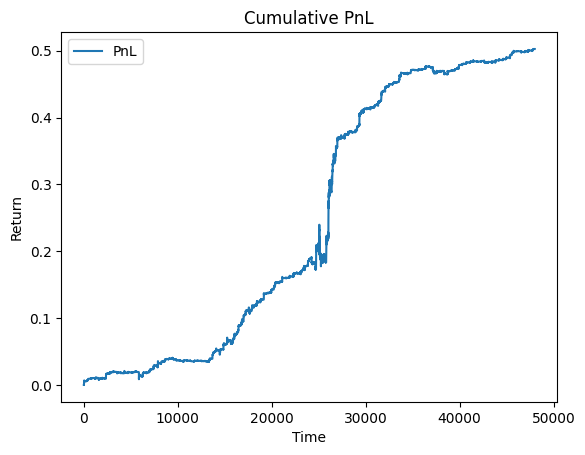

 17%|█▋        | 169/1000 [2:21:27<11:06:44, 48.14s/it]

Sharpe Ratio for the epoch: 13.9163
Average Weights:



Weight
Cash  9.111037e-01
MPWR  2.391260e-02
FICO  1.658470e-02
MTD   9.212448e-03
BKNG  7.626982e-03
...            ...
AAL   1.186746e-12
ROST  1.149640e-12
TEL   1.144930e-12
MCD   1.060486e-12
TGT   1.010587e-12

[489 rows x 1 columns]

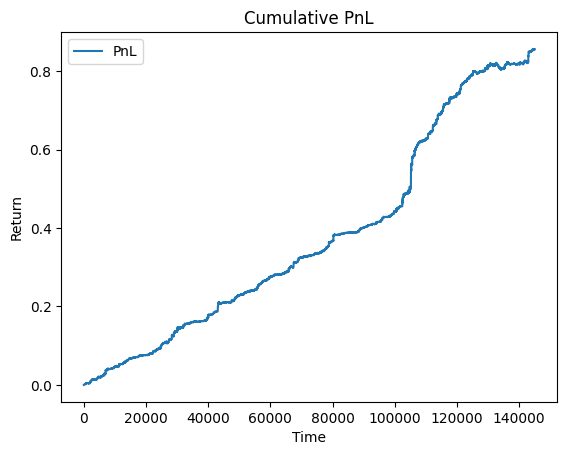

Sharpe Ratio for the epoch: 9.1761
Average Weights:



Weight
Cash  8.745559e-01
FICO  2.400824e-02
NVR   2.042736e-02
MPWR  1.460956e-02
MTD   1.375106e-02
...            ...
AAL   1.071857e-12
ROST  1.045241e-12
TEL   1.040239e-12
MCD   9.640702e-13
TGT   9.213432e-13

[489 rows x 1 columns]

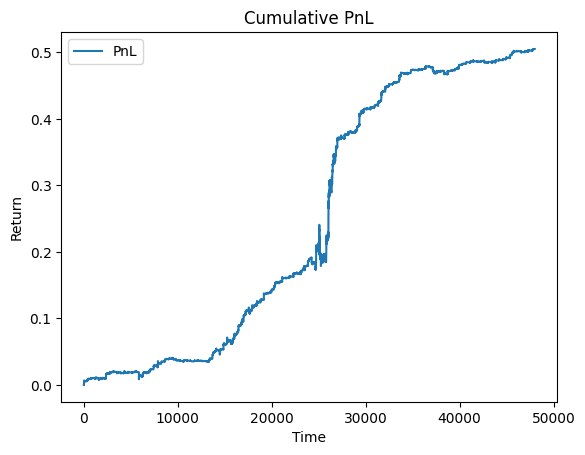

 17%|█▋        | 174/1000 [2:25:29<11:03:39, 48.21s/it]

Sharpe Ratio for the epoch: 13.9419
Average Weights:



Weight
Cash  9.128891e-01
MPWR  2.303570e-02
FICO  1.624733e-02
MTD   8.900180e-03
BKNG  7.009926e-03
...            ...
AAL   8.147529e-13
TEL   8.019246e-13
ROST  8.016735e-13
MCD   7.525699e-13
TGT   7.127172e-13

[489 rows x 1 columns]

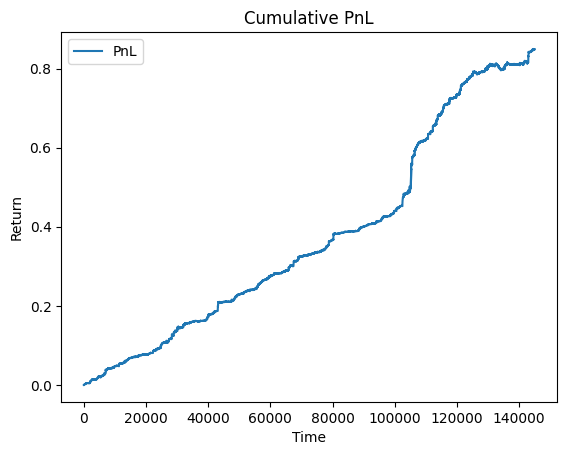

Sharpe Ratio for the epoch: 9.2226
Average Weights:



Weight
Cash  8.735790e-01
FICO  2.552700e-02
NVR   2.043894e-02
MPWR  1.490015e-02
MTD   1.403178e-02
...            ...
AAL   7.534460e-13
ROST  7.466662e-13
TEL   7.462884e-13
MCD   7.008686e-13
TGT   6.656422e-13

[489 rows x 1 columns]

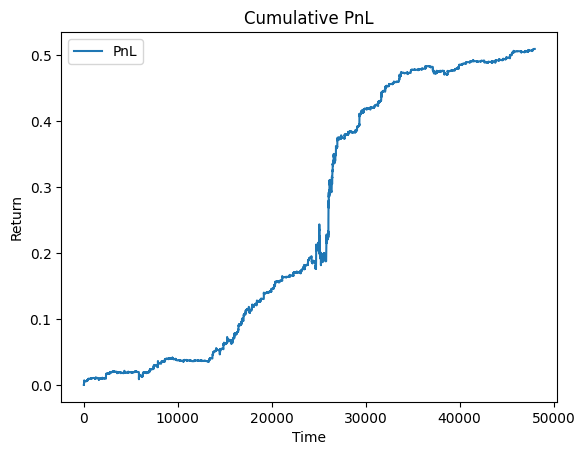

 18%|█▊        | 179/1000 [2:29:29<10:56:25, 47.97s/it]

Sharpe Ratio for the epoch: 14.1058
Average Weights:



Weight
Cash  9.131044e-01
MPWR  2.301745e-02
FICO  1.620012e-02
MTD   8.929458e-03
BKNG  6.842818e-03
...            ...
TEL   6.094221e-13
ROST  6.064244e-13
AAL   6.049893e-13
MCD   5.804941e-13
TGT   5.458253e-13

[489 rows x 1 columns]

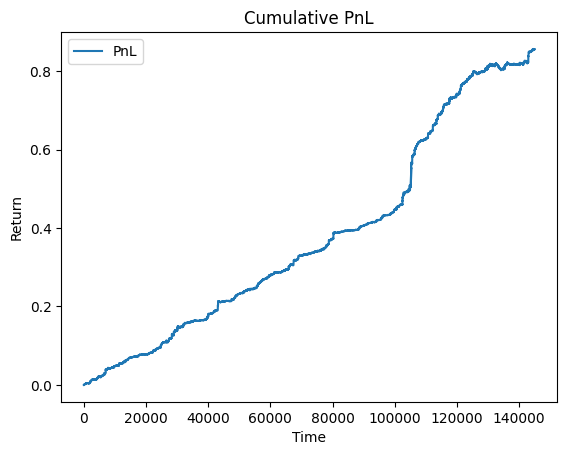

Sharpe Ratio for the epoch: 9.2660
Average Weights:



Weight
Cash  8.738168e-01
FICO  2.539907e-02
NVR   2.016321e-02
MPWR  1.476611e-02
MTD   1.397334e-02
...            ...
TEL   5.663491e-13
ROST  5.639852e-13
AAL   5.585617e-13
MCD   5.397811e-13
TGT   5.090749e-13

[489 rows x 1 columns]

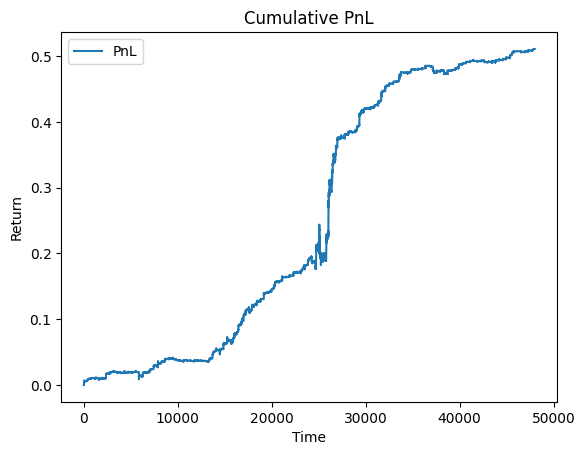

 18%|█▊        | 184/1000 [2:33:30<10:54:38, 48.14s/it]

Sharpe Ratio for the epoch: 14.2337
Average Weights:



Weight
Cash  9.134795e-01
MPWR  2.292355e-02
FICO  1.612669e-02
MTD   8.920722e-03
BKNG  6.729306e-03
...            ...
TEL   4.705127e-13
ROST  4.658622e-13
AAL   4.555528e-13
MCD   4.551720e-13
TGT   4.247346e-13

[489 rows x 1 columns]

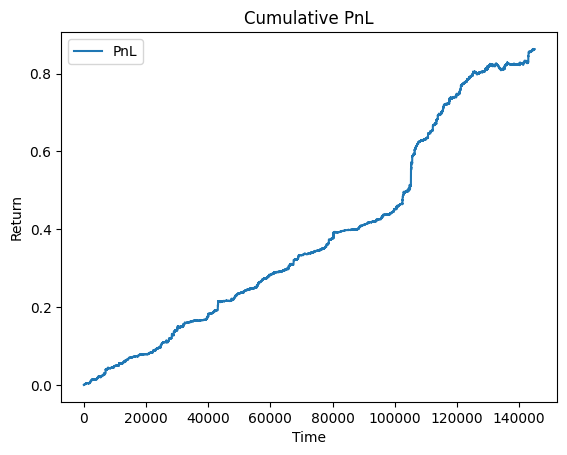

Sharpe Ratio for the epoch: 9.3135
Average Weights:



Weight
Cash  8.744206e-01
FICO  2.546002e-02
NVR   1.994548e-02
MPWR  1.461399e-02
MTD   1.397225e-02
...            ...
TEL   4.360129e-13
ROST  4.320227e-13
MCD   4.219496e-13
AAL   4.193524e-13
TGT   3.950049e-13

[489 rows x 1 columns]

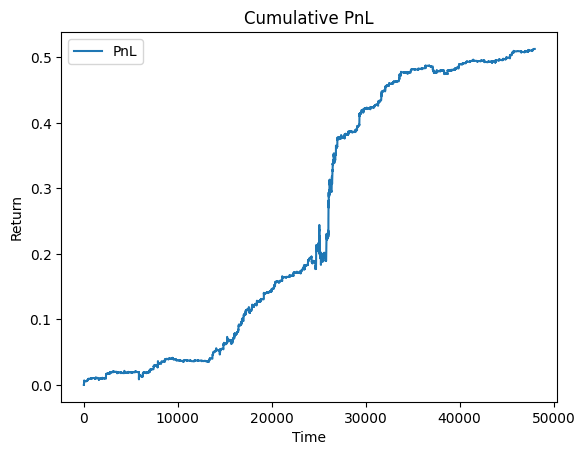

 19%|█▉        | 189/1000 [2:37:30<10:50:34, 48.13s/it]

Sharpe Ratio for the epoch: 14.3551
Average Weights:



Weight
Cash  9.136999e-01
MPWR  2.287427e-02
FICO  1.608040e-02
MTD   8.938126e-03
BKNG  6.633783e-03
...            ...
TEL   3.716437e-13
ROST  3.660989e-13
MCD   3.650447e-13
AAL   3.507238e-13
TGT   3.380465e-13

[489 rows x 1 columns]

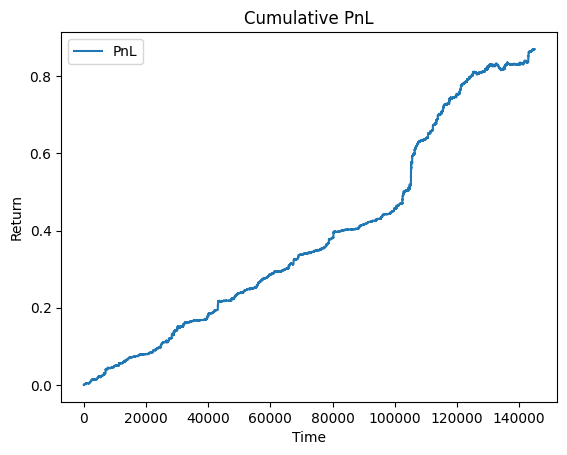

Sharpe Ratio for the epoch: 9.3631
Average Weights:



Weight
Cash  8.750746e-01
FICO  2.546036e-02
NVR   1.969093e-02
MPWR  1.442394e-02
MTD   1.396314e-02
...            ...
TEL   3.427898e-13
ROST  3.379262e-13
MCD   3.367248e-13
AAL   3.213552e-13
TGT   3.129084e-13

[489 rows x 1 columns]

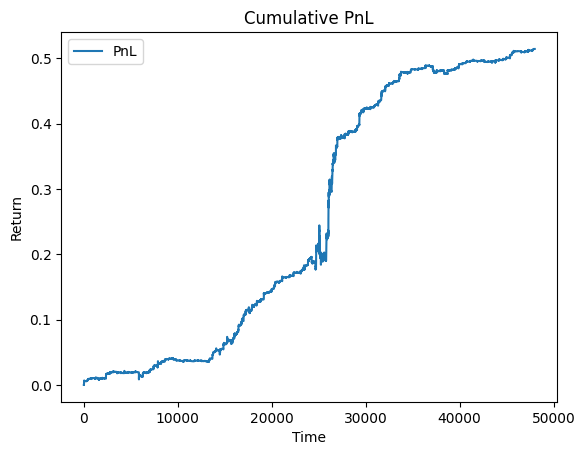

 19%|█▉        | 194/1000 [2:41:31<10:45:47, 48.07s/it]

Sharpe Ratio for the epoch: 14.4644
Average Weights:



Weight
Cash  9.139227e-01
MPWR  2.282945e-02
FICO  1.603737e-02
MTD   8.959086e-03
BKNG  6.541245e-03
...            ...
TEL   2.992820e-13
MCD   2.981886e-13
ROST  2.933460e-13
AAL   2.754423e-13
TGT   2.741611e-13

[489 rows x 1 columns]

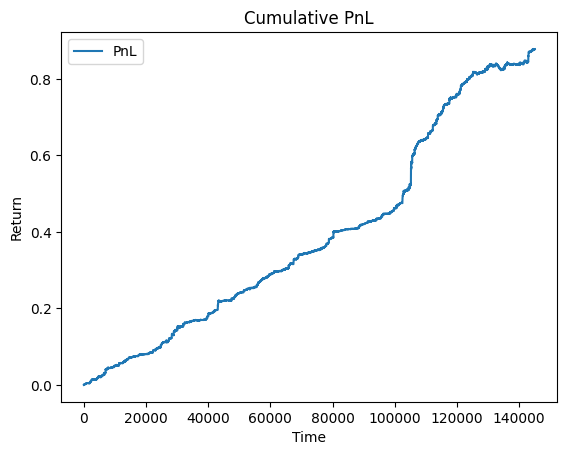

Sharpe Ratio for the epoch: 9.4150
Average Weights:



Weight
Cash  8.756601e-01
FICO  2.548210e-02
NVR   1.944344e-02
MPWR  1.423705e-02
MTD   1.396172e-02
...            ...
TEL   2.750063e-13
MCD   2.739281e-13
ROST  2.697583e-13
TGT   2.528029e-13
AAL   2.514559e-13

[489 rows x 1 columns]

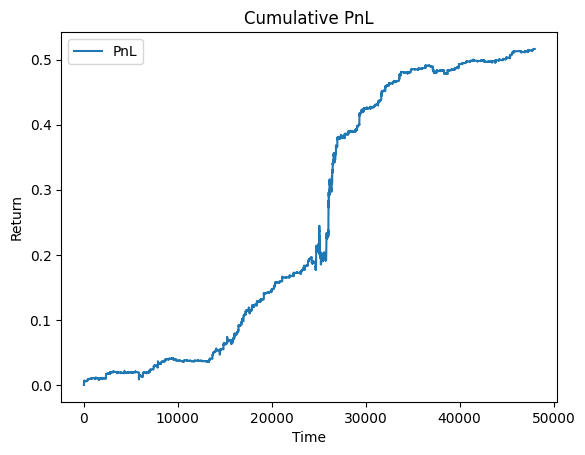

 20%|█▉        | 199/1000 [2:45:31<10:41:02, 48.02s/it]

Sharpe Ratio for the epoch: 14.5635
Average Weights:



Weight
Cash  9.141614e-01
MPWR  2.277675e-02
FICO  1.599349e-02
MTD   8.982562e-03
BKNG  6.452227e-03
...            ...
BBY   2.467649e-13
TEL   2.453719e-13
ROST  2.393773e-13
TGT   2.262127e-13
AAL   2.205675e-13

[489 rows x 1 columns]

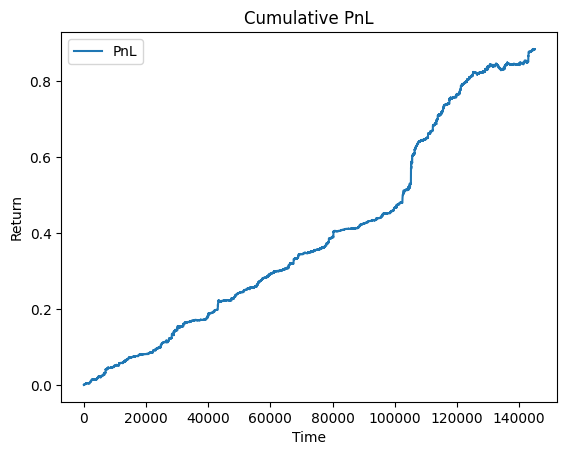

Sharpe Ratio for the epoch: 9.4676
Average Weights:



Weight
Cash  8.763320e-01
FICO  2.547829e-02
NVR   1.923118e-02
MPWR  1.404834e-02
MTD   1.394328e-02
...            ...
TEL   2.244472e-13
BBY   2.243618e-13
ROST  2.191387e-13
TGT   2.076303e-13
AAL   2.004832e-13

[489 rows x 1 columns]

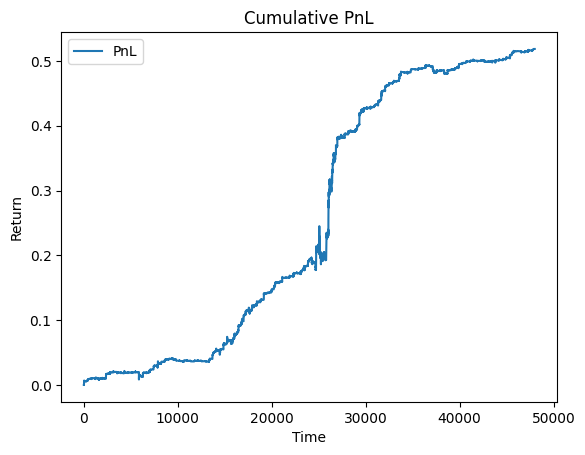

 20%|██        | 204/1000 [2:49:33<10:39:32, 48.21s/it]

Sharpe Ratio for the epoch: 14.6527
Average Weights:



Weight
Cash  9.143302e-01
MPWR  2.274339e-02
FICO  1.596512e-02
MTD   9.017567e-03
BKNG  6.370559e-03
...            ...
TEL   2.046590e-13
BBY   2.042725e-13
ROST  1.987998e-13
TGT   1.897347e-13
AAL   1.800634e-13

[489 rows x 1 columns]

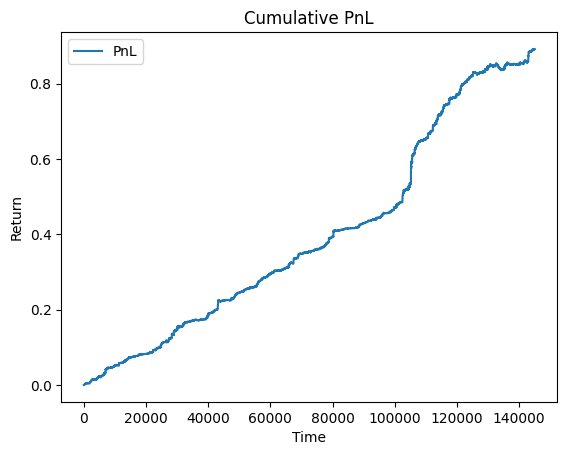

Sharpe Ratio for the epoch: 9.5198
Average Weights:



Weight
Cash  8.768387e-01
FICO  2.551989e-02
NVR   1.904934e-02
MTD   1.394524e-02
MPWR  1.388824e-02
...            ...
TEL   1.864977e-13
BBY   1.850354e-13
ROST  1.813096e-13
TGT   1.734768e-13
AAL   1.630829e-13

[489 rows x 1 columns]

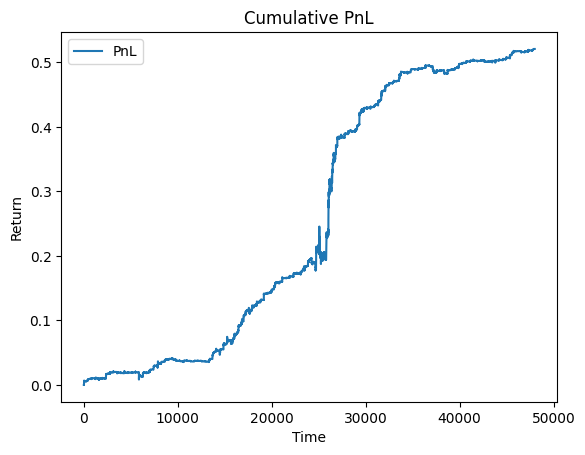

 21%|██        | 209/1000 [2:53:34<10:35:22, 48.20s/it]

Sharpe Ratio for the epoch: 14.7346
Average Weights:



Weight
Cash  9.144418e-01
MPWR  2.273179e-02
FICO  1.594566e-02
MTD   9.060458e-03
BKNG  6.299388e-03
...            ...
DOW   1.721395e-13
BBY   1.718091e-13
ROST  1.676686e-13
TGT   1.614204e-13
AAL   1.495749e-13

[489 rows x 1 columns]

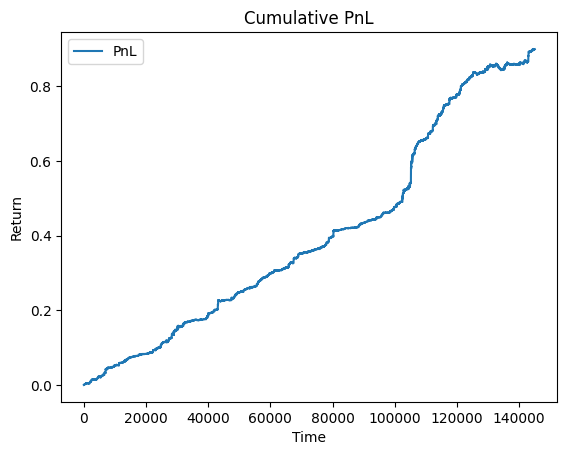

Sharpe Ratio for the epoch: 9.5697
Average Weights:



Weight
Cash  8.773324e-01
FICO  2.557052e-02
NVR   1.890164e-02
MTD   1.395585e-02
MPWR  1.373556e-02
...            ...
DOW   1.562148e-13
BBY   1.549637e-13
ROST  1.522592e-13
TGT   1.469386e-13
AAL   1.349125e-13

[489 rows x 1 columns]

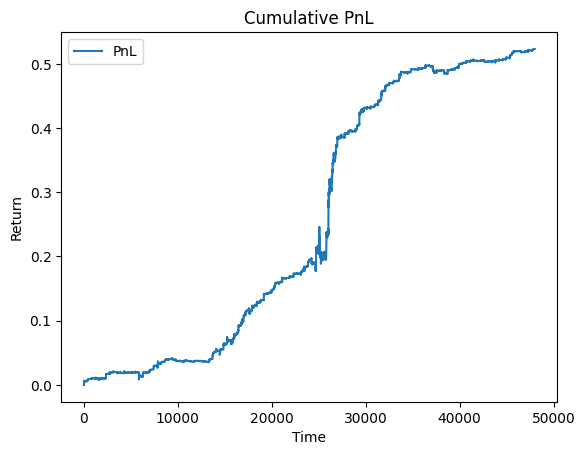

 21%|██▏       | 214/1000 [2:57:35<10:29:47, 48.08s/it]

Sharpe Ratio for the epoch: 14.8105
Average Weights:



Weight
Cash  9.145757e-01
MPWR  2.269547e-02
FICO  1.592693e-02
MTD   9.101515e-03
BKNG  6.230485e-03
...            ...
BBY   1.464502e-13
DOW   1.461428e-13
ROST  1.432550e-13
TGT   1.389606e-13
AAL   1.261150e-13

[489 rows x 1 columns]

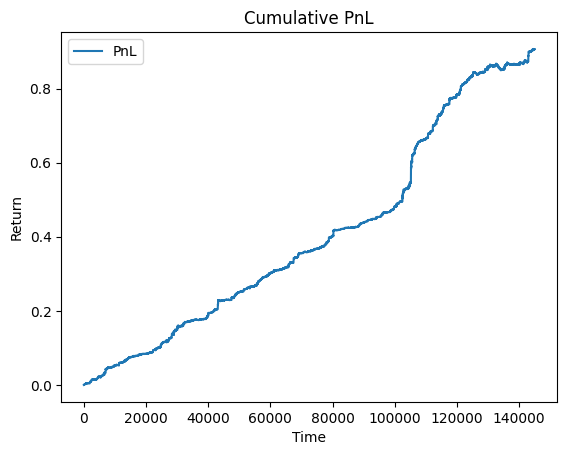

Sharpe Ratio for the epoch: 9.6140
Average Weights:



Weight
Cash  8.776847e-01
FICO  2.565279e-02
NVR   1.879883e-02
MTD   1.396834e-02
MPWR  1.360491e-02
...            ...
DOW   1.322806e-13
BBY   1.317355e-13
ROST  1.297345e-13
TGT   1.261372e-13
AAL   1.134634e-13

[489 rows x 1 columns]

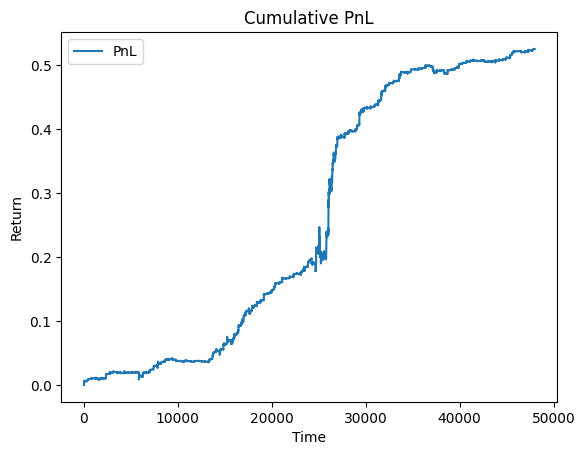

 22%|██▏       | 219/1000 [3:01:35<10:24:38, 47.99s/it]

Sharpe Ratio for the epoch: 14.8827
Average Weights:



Weight
Cash  9.146866e-01
MPWR  2.266766e-02
FICO  1.590927e-02
MTD   9.146367e-03
NVR   6.186678e-03
...            ...
BBY   1.263561e-13
DOW   1.256426e-13
ROST  1.238341e-13
TGT   1.209110e-13
AAL   1.077831e-13

[489 rows x 1 columns]

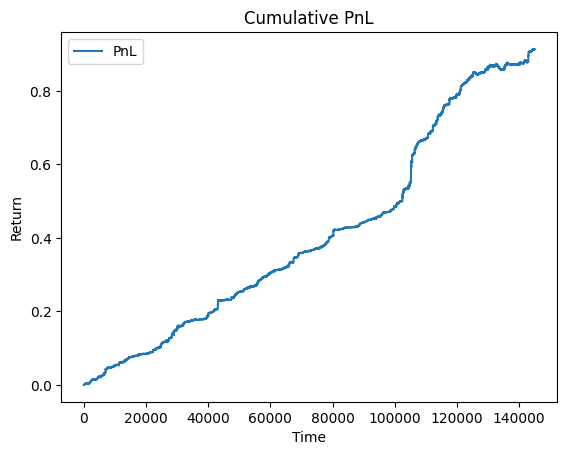

Sharpe Ratio for the epoch: 9.6499
Average Weights:



Weight
Cash  8.781047e-01
FICO  2.569882e-02
NVR   1.868172e-02
MTD   1.397860e-02
MPWR  1.345166e-02
...            ...
DOW   1.133602e-13
BBY   1.132849e-13
ROST  1.117730e-13
TGT   1.093790e-13
AAL   9.666489e-14

[489 rows x 1 columns]

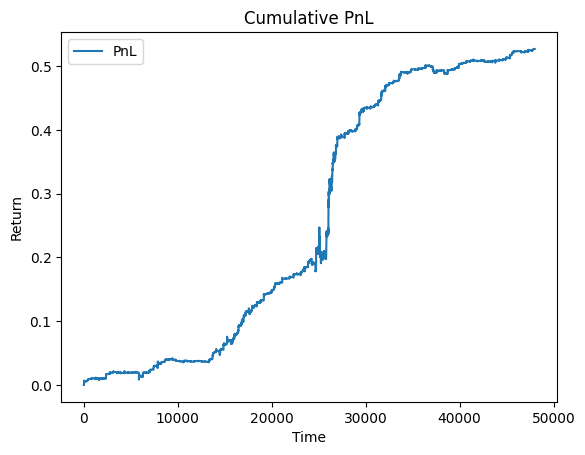

 22%|██▏       | 224/1000 [3:05:35<10:19:44, 47.92s/it]

Sharpe Ratio for the epoch: 14.9526
Average Weights:



Weight
Cash  9.147657e-01
MPWR  2.263556e-02
FICO  1.589570e-02
MTD   9.192553e-03
NVR   6.231938e-03
...            ...
BBY   1.102124e-13
DOW   1.092514e-13
ROST  1.081817e-13
TGT   1.062253e-13
AAL   9.324647e-14

[489 rows x 1 columns]

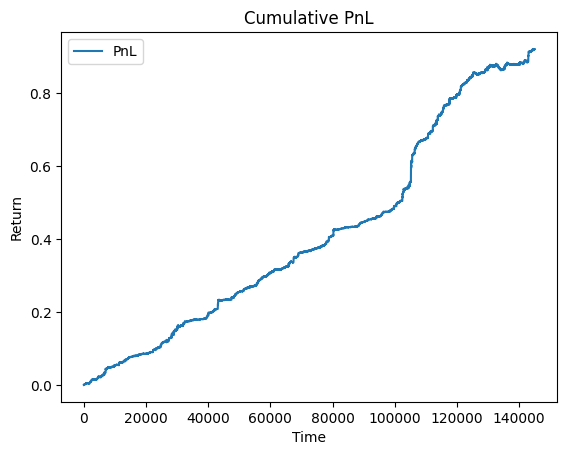

Sharpe Ratio for the epoch: 9.6859
Average Weights:



Weight
Cash  8.784271e-01
FICO  2.576681e-02
NVR   1.859636e-02
MTD   1.400676e-02
MPWR  1.331693e-02
...            ...
BBY   9.850690e-14
DOW   9.827598e-14
ROST  9.734247e-14
TGT   9.578934e-14
AAL   8.338163e-14

[489 rows x 1 columns]

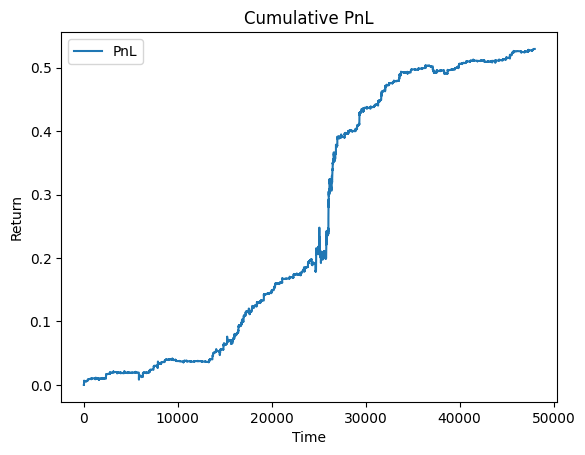

 23%|██▎       | 229/1000 [3:09:36<10:18:14, 48.11s/it]

Sharpe Ratio for the epoch: 15.0200
Average Weights:



Weight
Cash  9.148491e-01
MPWR  2.260051e-02
FICO  1.588459e-02
MTD   9.241817e-03
NVR   6.274608e-03
...            ...
BBY   9.697550e-14
DOW   9.587001e-14
ROST  9.531062e-14
TGT   9.404230e-14
AAL   8.147118e-14

[489 rows x 1 columns]

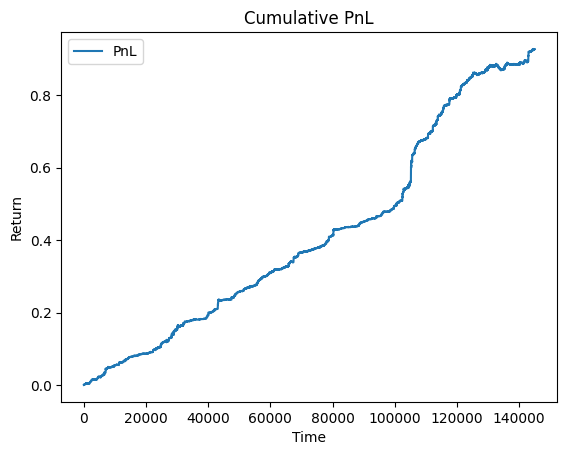

Sharpe Ratio for the epoch: 9.7191
Average Weights:



Weight
Cash  8.788419e-01
FICO  2.581835e-02
NVR   1.849634e-02
MTD   1.402010e-02
MPWR  1.315521e-02
...            ...
BBY   8.634464e-14
DOW   8.591621e-14
ROST  8.543126e-14
TGT   8.447281e-14
AAL   7.258235e-14

[489 rows x 1 columns]

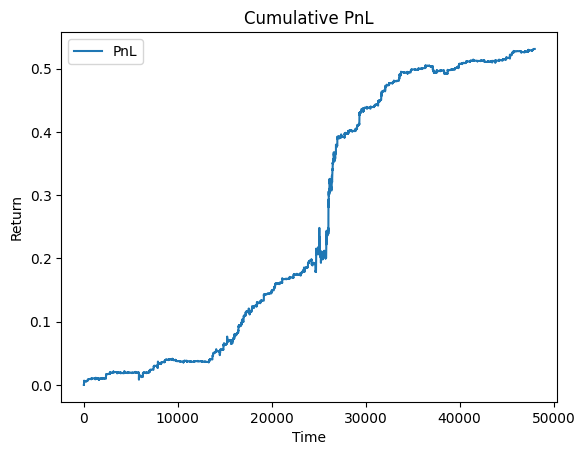

 23%|██▎       | 234/1000 [3:13:37<10:14:39, 48.15s/it]

Sharpe Ratio for the epoch: 15.0834
Average Weights:



Weight
Cash  9.149248e-01
MPWR  2.256526e-02
FICO  1.586704e-02
MTD   9.285351e-03
NVR   6.314009e-03
...            ...
BBY   8.603182e-14
DOW   8.484929e-14
ROST  8.464155e-14
TGT   8.386651e-14
AAL   7.184031e-14

[489 rows x 1 columns]

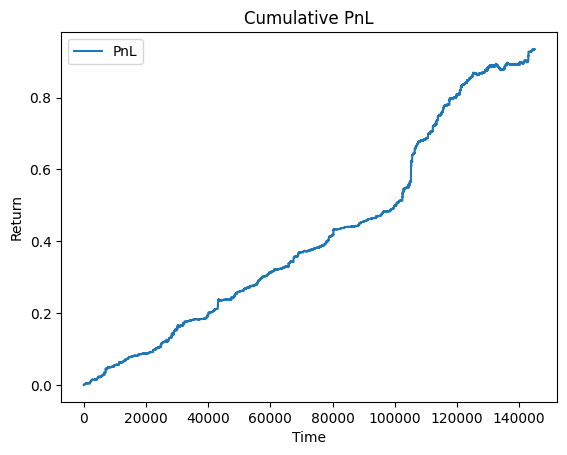

Sharpe Ratio for the epoch: 9.7488
Average Weights:



Weight
Cash  8.791680e-01
FICO  2.587038e-02
NVR   1.840897e-02
MTD   1.404359e-02
MPWR  1.300903e-02
...            ...
ALB   7.631437e-14
DOW   7.580603e-14
ROST  7.562927e-14
TGT   7.509217e-14
AAL   6.380814e-14

[489 rows x 1 columns]

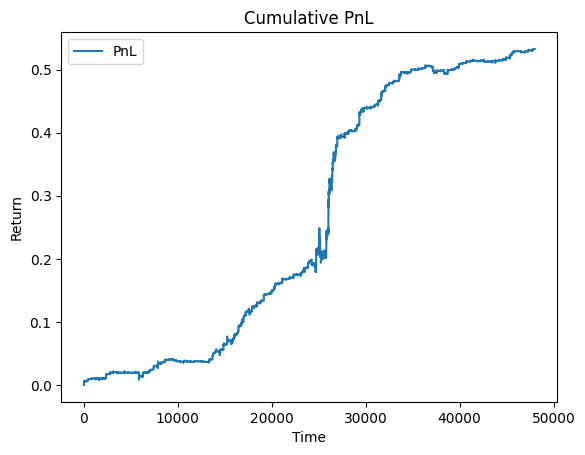

 24%|██▍       | 239/1000 [3:17:38<10:10:02, 48.10s/it]

Sharpe Ratio for the epoch: 15.1452
Average Weights:



Weight
Cash  9.149876e-01
MPWR  2.253118e-02
FICO  1.585523e-02
MTD   9.330213e-03
NVR   6.353692e-03
...            ...
ALB   7.632549e-14
ROST  7.566744e-14
DOW   7.563346e-14
TGT   7.524897e-14
AAL   6.383472e-14

[489 rows x 1 columns]

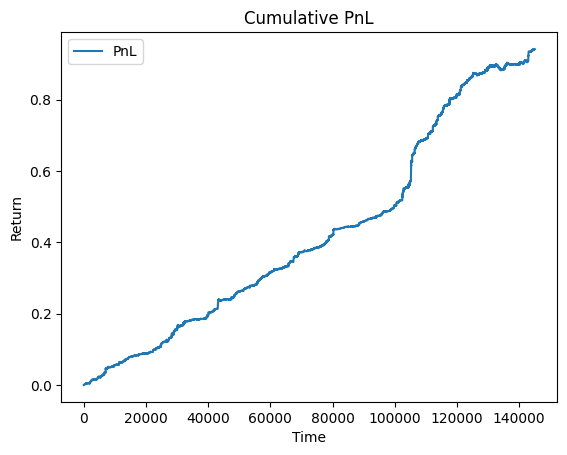

Sharpe Ratio for the epoch: 9.7747
Average Weights:



Weight
Cash  8.795416e-01
FICO  2.591018e-02
NVR   1.831838e-02
MTD   1.405874e-02
MPWR  1.285537e-02
...            ...
ALB   6.736818e-14
ROST  6.735764e-14
DOW   6.732338e-14
TGT   6.712111e-14
AAL   5.649120e-14

[489 rows x 1 columns]

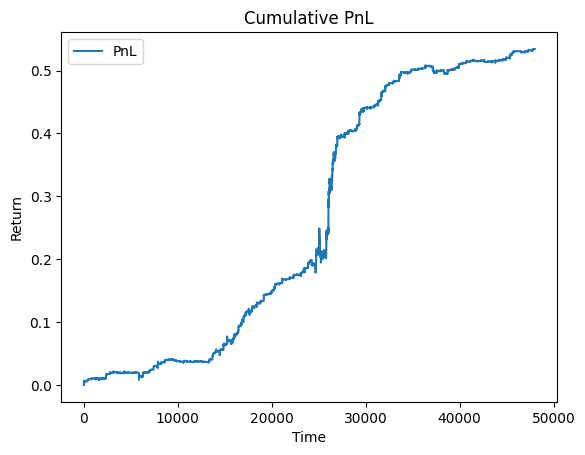

 24%|██▍       | 244/1000 [3:21:38<10:05:24, 48.05s/it]

Sharpe Ratio for the epoch: 15.2037
Average Weights:



Weight
Cash  9.150421e-01
MPWR  2.250139e-02
FICO  1.584462e-02
MTD   9.377546e-03
NVR   6.391166e-03
...            ...
ALB   6.811183e-14
ROST  6.804281e-14
TGT   6.788192e-14
DOW   6.784179e-14
AAL   5.710398e-14

[489 rows x 1 columns]

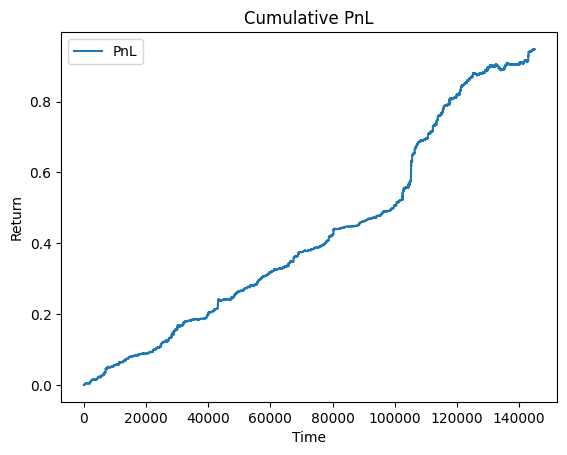

Sharpe Ratio for the epoch: 9.7989
Average Weights:



Weight
Cash  8.798730e-01
FICO  2.594999e-02
NVR   1.823574e-02
MTD   1.407819e-02
MPWR  1.271119e-02
...            ...
ROST  6.037703e-14
TGT   6.035472e-14
DOW   6.019890e-14
ALB   5.993603e-14
AAL   5.037817e-14

[489 rows x 1 columns]

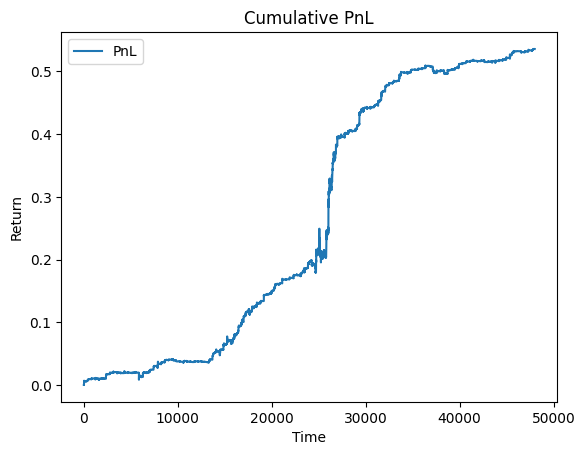

 25%|██▍       | 249/1000 [3:25:40<10:04:21, 48.28s/it]

Sharpe Ratio for the epoch: 15.2635
Average Weights:



Weight
Cash  9.149805e-01
MPWR  2.248549e-02
FICO  1.585384e-02
MTD   9.435332e-03
NVR   6.435628e-03
...            ...
TGT   6.163109e-14
ROST  6.160692e-14
DOW   6.129140e-14
ALB   6.126755e-14
AAL   5.147028e-14

[489 rows x 1 columns]

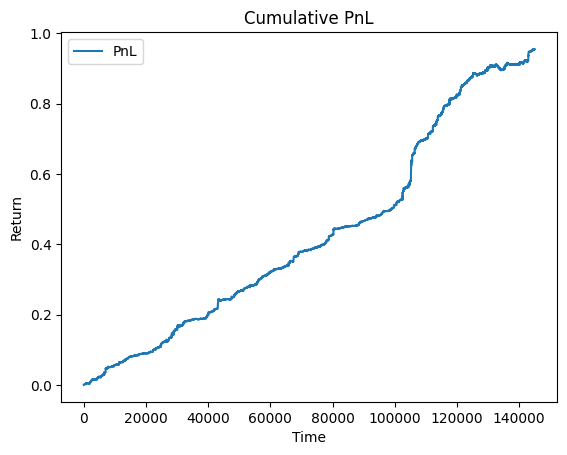

Sharpe Ratio for the epoch: 9.8199
Average Weights:



Weight
Cash  8.801656e-01
FICO  2.597683e-02
NVR   1.815279e-02
MTD   1.410500e-02
MPWR  1.257715e-02
...            ...
TGT   5.455090e-14
ROST  5.442217e-14
DOW   5.414599e-14
ALB   5.367927e-14
AAL   4.520868e-14

[489 rows x 1 columns]

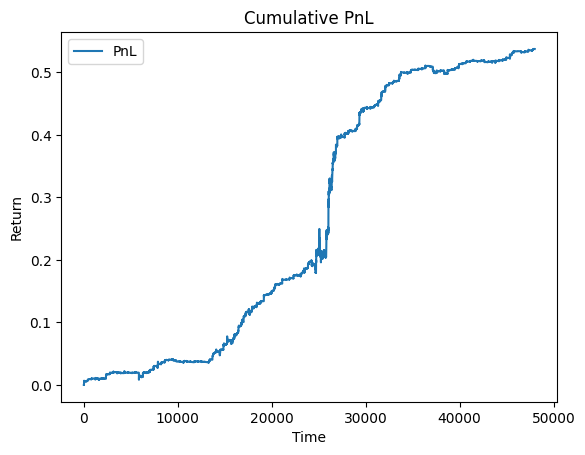

 25%|██▌       | 254/1000 [3:29:41<9:58:37, 48.15s/it] 

Sharpe Ratio for the epoch: 15.3204
Average Weights:



Weight
Cash  9.149758e-01
MPWR  2.245974e-02
FICO  1.585513e-02
MTD   9.486582e-03
NVR   6.474551e-03
...            ...
TGT   5.614692e-14
ROST  5.598650e-14
DOW   5.559612e-14
ALB   5.537047e-14
AAL   4.659392e-14

[489 rows x 1 columns]

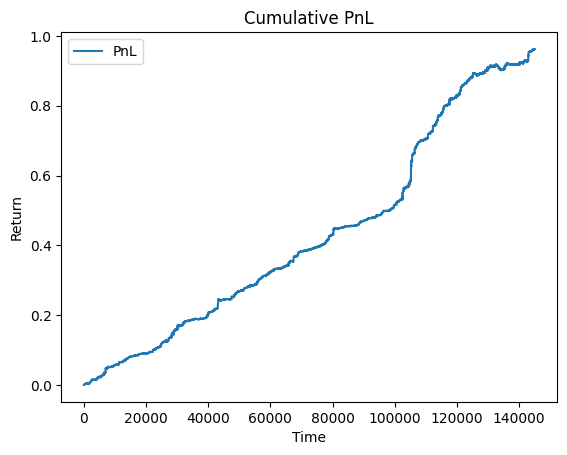

Sharpe Ratio for the epoch: 9.8399
Average Weights:



Weight
Cash  8.804632e-01
FICO  2.601380e-02
NVR   1.808137e-02
MTD   1.412859e-02
MPWR  1.242947e-02
...            ...
TGT   4.950474e-14
ROST  4.926665e-14
DOW   4.892746e-14
ALB   4.833146e-14
AAL   4.077085e-14

[489 rows x 1 columns]

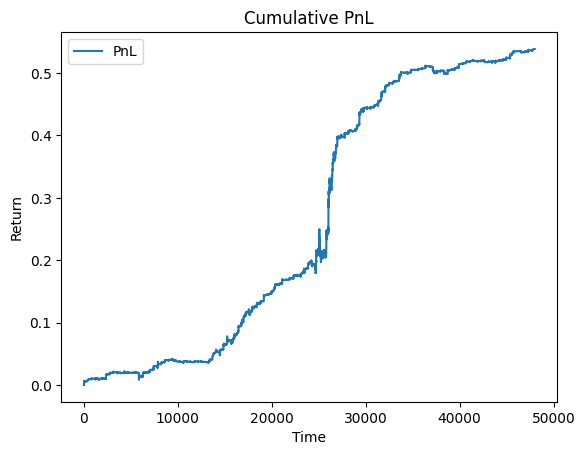

 26%|██▌       | 259/1000 [3:33:43<9:56:18, 48.28s/it]

Sharpe Ratio for the epoch: 15.3763
Average Weights:



Weight
Cash  9.149841e-01
MPWR  2.242867e-02
FICO  1.585119e-02
MTD   9.534511e-03
NVR   6.511596e-03
...            ...
TGT   5.133620e-14
ROST  5.107777e-14
DOW   5.063997e-14
ALB   5.027745e-14
AAL   4.236667e-14

[489 rows x 1 columns]

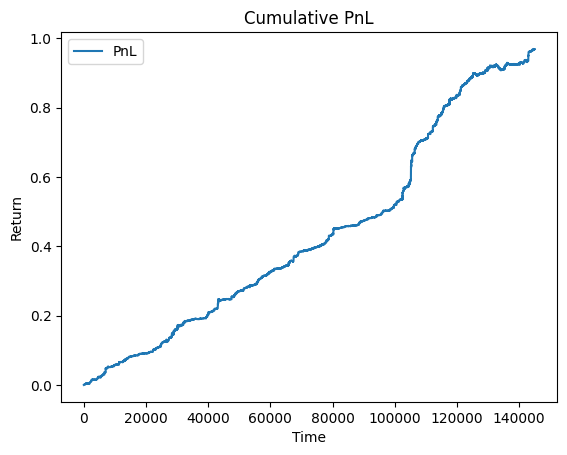

Sharpe Ratio for the epoch: 9.8576
Average Weights:



Weight
Cash  8.807514e-01
FICO  2.603760e-02
NVR   1.801236e-02
MTD   1.415173e-02
MPWR  1.229182e-02
...            ...
BBY   4.510075e-14
ROST  4.479021e-14
DOW   4.441145e-14
ALB   4.373667e-14
AAL   3.694467e-14

[489 rows x 1 columns]

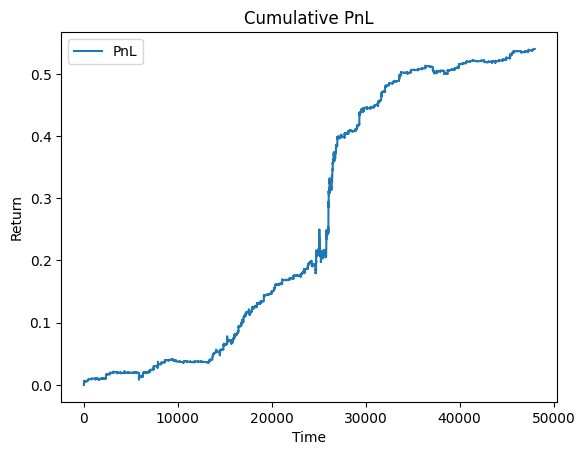

 26%|██▋       | 264/1000 [3:37:45<9:52:42, 48.32s/it]

Sharpe Ratio for the epoch: 15.4318
Average Weights:



Weight
Cash  9.150033e-01
MPWR  2.239174e-02
FICO  1.584774e-02
MTD   9.580873e-03
NVR   6.545346e-03
...            ...
TGT   4.709629e-14
ROST  4.676851e-14
DOW   4.630182e-14
ALB   4.584931e-14
AAL   3.867837e-14

[489 rows x 1 columns]

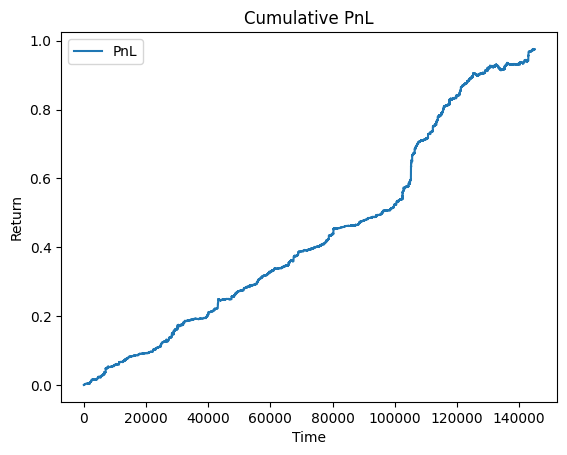

Sharpe Ratio for the epoch: 9.8757
Average Weights:



Weight
Cash  8.810165e-01
FICO  2.607173e-02
NVR   1.794920e-02
MTD   1.417608e-02
MPWR  1.215584e-02
...            ...
BBY   4.114794e-14
ROST  4.087438e-14
DOW   4.047226e-14
ALB   3.975498e-14
AAL   3.361750e-14

[489 rows x 1 columns]

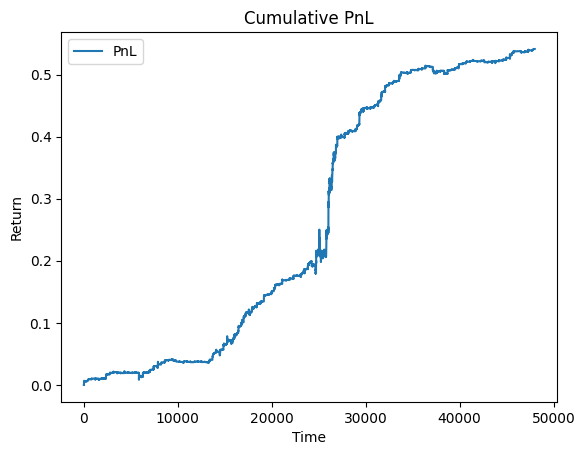

 27%|██▋       | 269/1000 [3:41:47<9:48:35, 48.31s/it]

Sharpe Ratio for the epoch: 15.4867
Average Weights:



Weight
Cash  9.149757e-01
MPWR  2.236808e-02
FICO  1.585068e-02
MTD   9.630243e-03
NVR   6.580831e-03
...            ...
TGT   4.336484e-14
ROST  4.298911e-14
DOW   4.250709e-14
ALB   4.199690e-14
AAL   3.546116e-14

[489 rows x 1 columns]

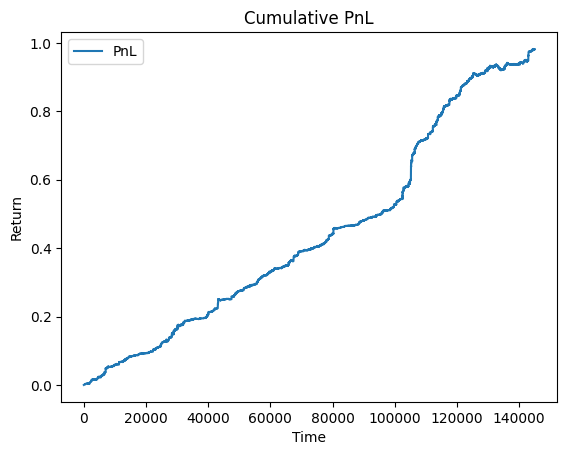

Sharpe Ratio for the epoch: 9.8920
Average Weights:



Weight
Cash  8.812685e-01
FICO  2.609719e-02
NVR   1.788331e-02
MTD   1.419926e-02
MPWR  1.200775e-02
...            ...
BBY   3.767788e-14
ROST  3.743423e-14
DOW   3.702083e-14
ALB   3.628466e-14
AAL   3.071029e-14

[489 rows x 1 columns]

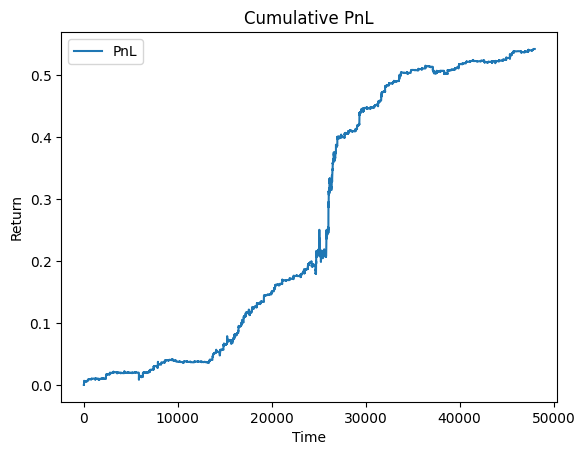

 27%|██▋       | 274/1000 [3:45:48<9:43:41, 48.24s/it]

Sharpe Ratio for the epoch: 15.5418
Average Weights:



Weight
Cash  9.149148e-01
MPWR  2.234327e-02
FICO  1.586151e-02
MTD   9.683006e-03
NVR   6.619287e-03
...            ...
TGT   4.005532e-14
ROST  3.964769e-14
DOW   3.915923e-14
ALB   3.861574e-14
AAL   3.263072e-14

[489 rows x 1 columns]

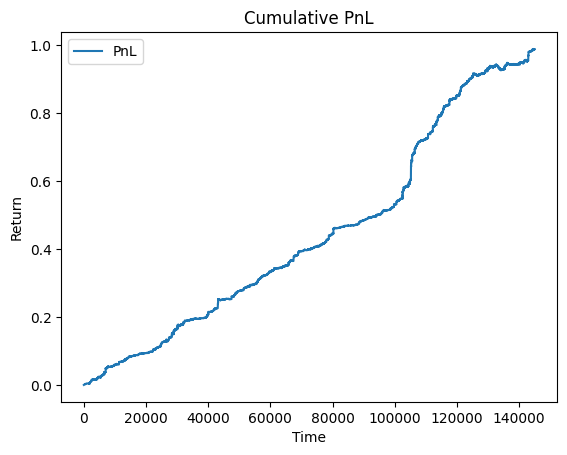

Sharpe Ratio for the epoch: 9.9091
Average Weights:



Weight
Cash  8.814558e-01
FICO  2.614095e-02
NVR   1.783521e-02
MTD   1.422842e-02
MPWR  1.187212e-02
...            ...
BBY   3.462312e-14
ROST  3.440437e-14
DOW   3.398690e-14
ALB   3.324950e-14
AAL   2.816184e-14

[489 rows x 1 columns]

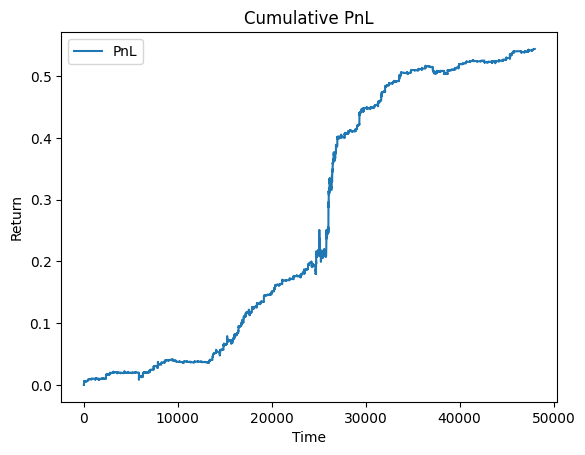

 28%|██▊       | 279/1000 [3:49:49<9:37:22, 48.05s/it]

Sharpe Ratio for the epoch: 15.5965
Average Weights:



Weight
Cash  9.149801e-01
MPWR  2.229503e-02
FICO  1.584337e-02
MTD   9.718391e-03
NVR   6.647707e-03
...            ...
TGT   3.703304e-14
ROST  3.660489e-14
DOW   3.611878e-14
ALB   3.555925e-14
AAL   3.006629e-14

[489 rows x 1 columns]

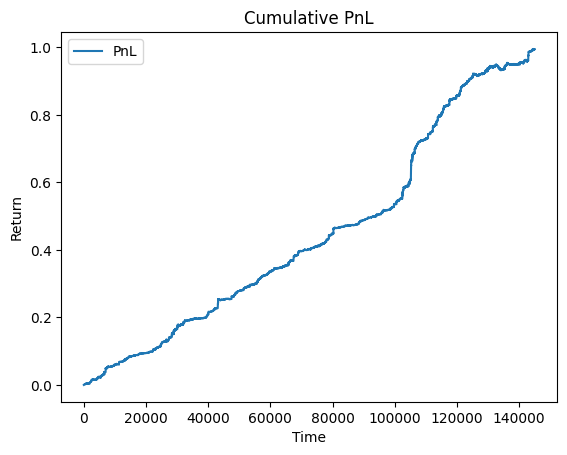

Sharpe Ratio for the epoch: 9.9191
Average Weights:



Weight
Cash  8.818722e-01
FICO  2.611598e-02
NVR   1.775134e-02
MTD   1.422448e-02
MPWR  1.171843e-02
...            ...
BBY   3.182413e-14
ROST  3.162650e-14
DOW   3.121276e-14
ALB   3.048701e-14
AAL   2.583709e-14

[489 rows x 1 columns]

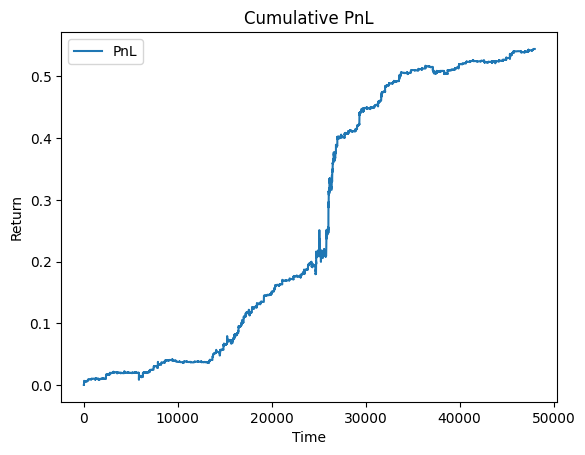

 28%|██▊       | 284/1000 [3:53:50<9:34:38, 48.15s/it]

Sharpe Ratio for the epoch: 15.6503
Average Weights:



Weight
Cash  9.149913e-01
MPWR  2.225403e-02
FICO  1.583318e-02
MTD   9.761701e-03
NVR   6.678786e-03
...            ...
BBY   3.434018e-14
ROST  3.390273e-14
DOW   3.342332e-14
ALB   3.285951e-14
AAL   2.779724e-14

[489 rows x 1 columns]

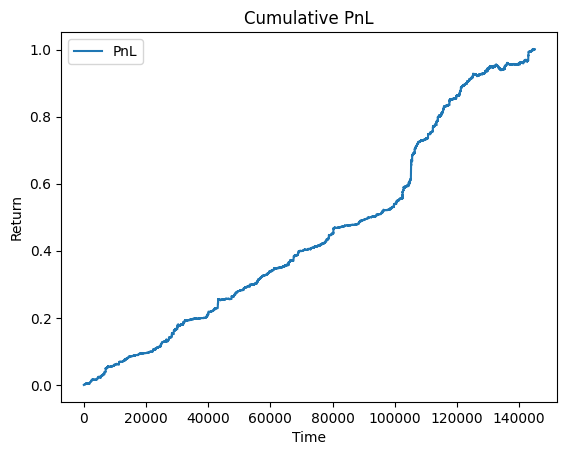

Sharpe Ratio for the epoch: 9.9260
Average Weights:



Weight
Cash  8.823473e-01
FICO  2.606832e-02
NVR   1.766249e-02
MTD   1.421254e-02
MPWR  1.155287e-02
...            ...
BBY   2.930381e-14
ROST  2.912331e-14
DOW   2.871792e-14
ALB   2.801199e-14
AAL   2.375087e-14

[489 rows x 1 columns]

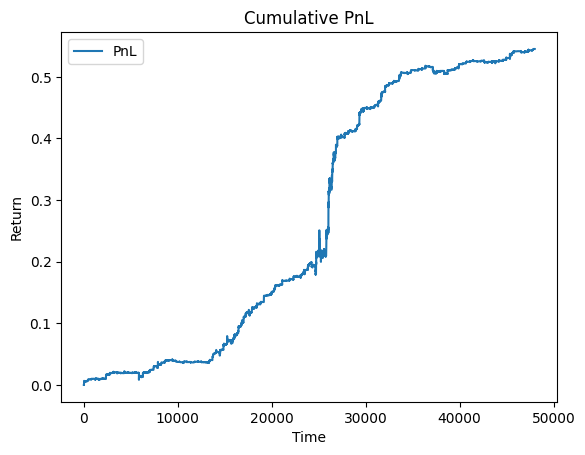

 29%|██▉       | 289/1000 [3:57:51<9:31:13, 48.20s/it]

Sharpe Ratio for the epoch: 15.7019
Average Weights:



Weight
Cash  9.150183e-01
MPWR  2.221425e-02
FICO  1.582186e-02
MTD   9.800540e-03
NVR   6.708420e-03
...            ...
MNST  3.186078e-14
ROST  3.146160e-14
DOW   3.099239e-14
ALB   3.043310e-14
AAL   2.575467e-14

[489 rows x 1 columns]

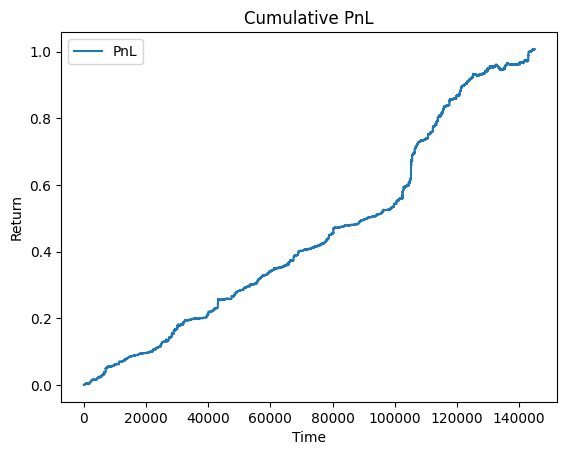

Sharpe Ratio for the epoch: 9.9356
Average Weights:



Weight
Cash  8.826960e-01
FICO  2.605375e-02
NVR   1.758892e-02
MTD   1.422217e-02
MPWR  1.141140e-02
...            ...
BBY   2.707943e-14
ROST  2.691395e-14
DOW   2.651879e-14
ALB   2.583703e-14
AAL   2.191485e-14

[489 rows x 1 columns]

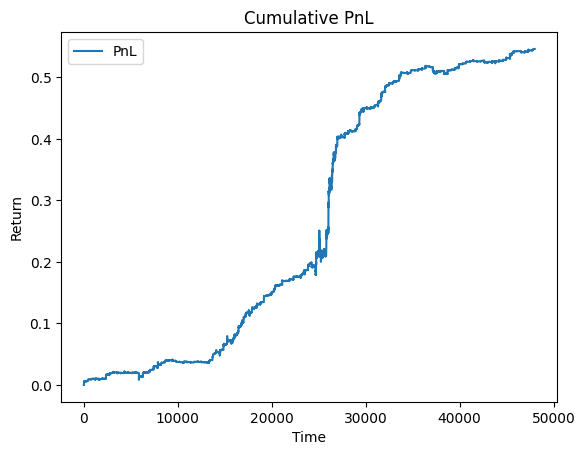

 29%|██▉       | 294/1000 [4:01:54<9:29:39, 48.41s/it]

Sharpe Ratio for the epoch: 15.7504
Average Weights:



Weight
Cash  9.150164e-01
MPWR  2.218121e-02
FICO  1.581549e-02
MTD   9.842359e-03
NVR   6.738881e-03
...            ...
MNST  2.961650e-14
ROST  2.926921e-14
DOW   2.881264e-14
ALB   2.826331e-14
AAL   2.392599e-14

[489 rows x 1 columns]

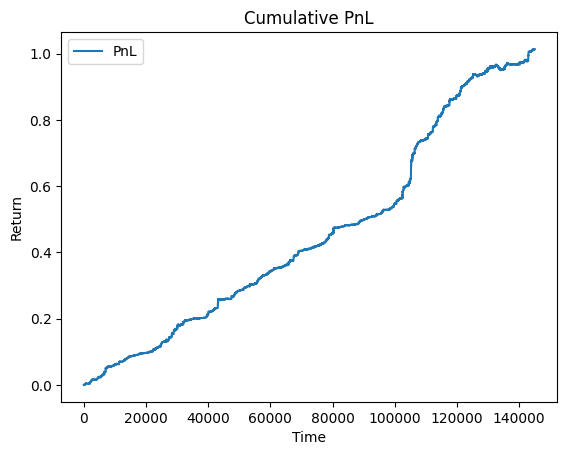

Sharpe Ratio for the epoch: 9.9472
Average Weights:



Weight
Cash  8.828250e-01
FICO  2.608275e-02
NVR   1.754321e-02
MTD   1.426486e-02
MPWR  1.129366e-02
...            ...
MNST  2.512215e-14
ROST  2.498724e-14
DOW   2.460351e-14
ALB   2.394691e-14
AAL   2.031780e-14

[489 rows x 1 columns]

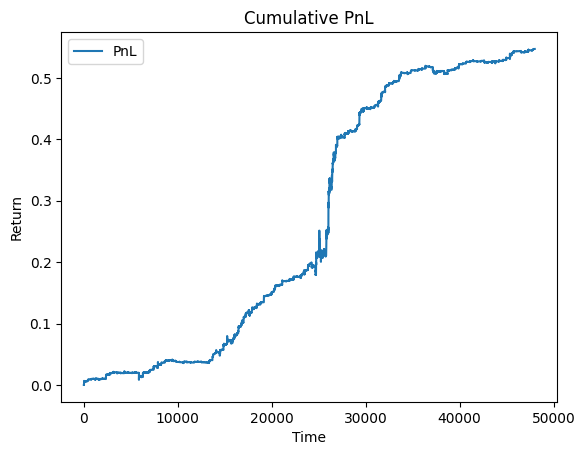

 30%|██▉       | 299/1000 [4:05:55<9:23:31, 48.23s/it]

Sharpe Ratio for the epoch: 15.7985
Average Weights:



Weight
Cash  9.150197e-01
MPWR  2.214376e-02
FICO  1.580944e-02
MTD   9.882298e-03
NVR   6.769531e-03
...            ...
MNST  2.758412e-14
ROST  2.728101e-14
DOW   2.683900e-14
ALB   2.630359e-14
AAL   2.227260e-14

[489 rows x 1 columns]

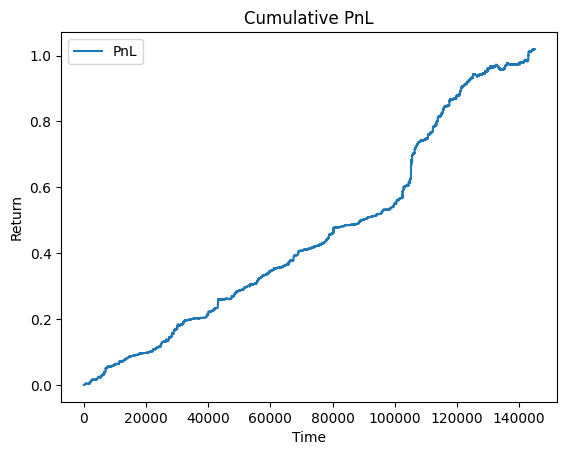

Sharpe Ratio for the epoch: 9.9569
Average Weights:



Weight
Cash  8.829722e-01
FICO  2.611735e-02
NVR   1.750323e-02
MTD   1.430401e-02
MPWR  1.117801e-02
...            ...
MNST  2.334232e-14
ROST  2.323492e-14
DOW   2.286414e-14
ALB   2.223474e-14
AAL   1.886939e-14

[489 rows x 1 columns]

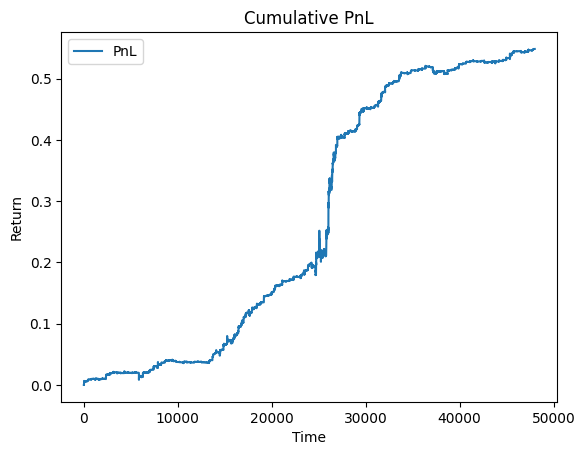

 30%|███       | 304/1000 [4:09:56<9:18:10, 48.12s/it]

Sharpe Ratio for the epoch: 15.8469
Average Weights:



Weight
Cash  9.150527e-01
MPWR  2.209889e-02
FICO  1.579742e-02
MTD   9.917162e-03
NVR   6.794937e-03
...            ...
MNST  2.572659e-14
ROST  2.546095e-14
DOW   2.503447e-14
ALB   2.451636e-14
AAL   2.076298e-14

[489 rows x 1 columns]

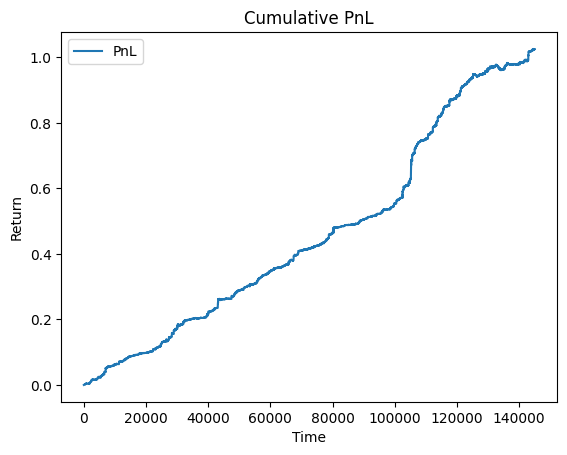

Sharpe Ratio for the epoch: 9.9636
Average Weights:



Weight
Cash  8.832752e-01
FICO  2.611439e-02
NVR   1.744279e-02
MTD   1.431938e-02
MPWR  1.104801e-02
...            ...
MNST  2.168921e-14
ROST  2.160430e-14
DOW   2.124790e-14
ALB   2.064793e-14
AAL   1.752568e-14

[489 rows x 1 columns]

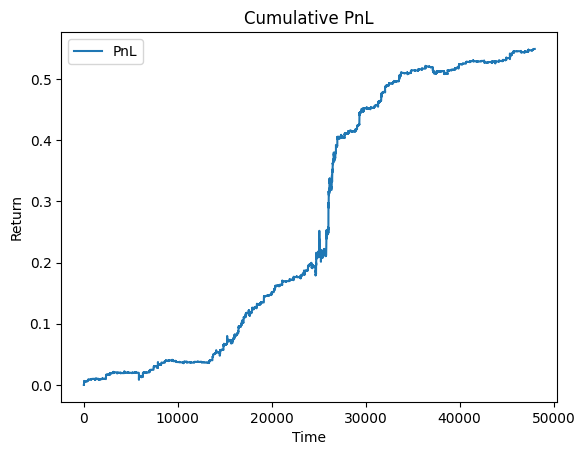

 31%|███       | 309/1000 [4:13:57<9:14:36, 48.16s/it]

Sharpe Ratio for the epoch: 15.8949
Average Weights:



Weight
Cash  9.150456e-01
MPWR  2.206100e-02
FICO  1.578964e-02
MTD   9.953004e-03
NVR   6.821460e-03
...            ...
MNST  2.405029e-14
ROST  2.381665e-14
DOW   2.340592e-14
ALB   2.290665e-14
AAL   1.940219e-14

[489 rows x 1 columns]

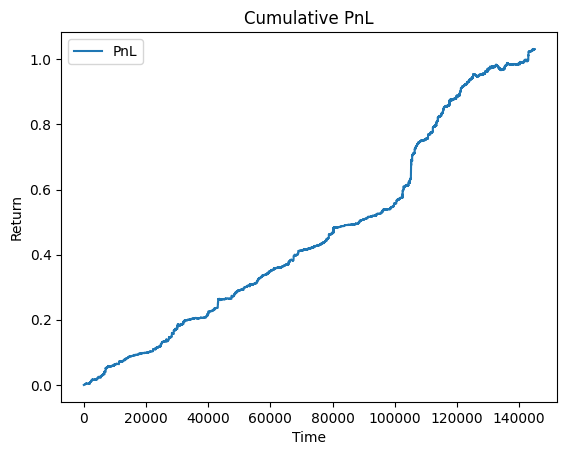

Sharpe Ratio for the epoch: 9.9703
Average Weights:



Weight
Cash  8.834562e-01
FICO  2.612577e-02
NVR   1.739115e-02
MTD   1.434334e-02
MPWR  1.092196e-02
...            ...
MNST  2.022048e-14
ROST  2.015410e-14
DOW   1.981176e-14
ALB   1.924045e-14
AAL   1.633293e-14

[489 rows x 1 columns]

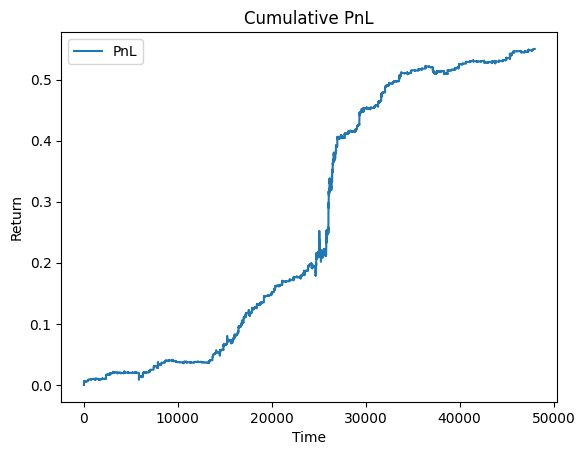

 31%|███▏      | 314/1000 [4:17:59<9:11:11, 48.21s/it]

Sharpe Ratio for the epoch: 15.9412
Average Weights:



Weight
Cash  9.150786e-01
MPWR  2.202037e-02
FICO  1.577318e-02
MTD   9.982744e-03
NVR   6.843595e-03
...            ...
PARA  2.242921e-14
ROST  2.230018e-14
DOW   2.190546e-14
ALB   2.142631e-14
AAL   1.814997e-14

[489 rows x 1 columns]

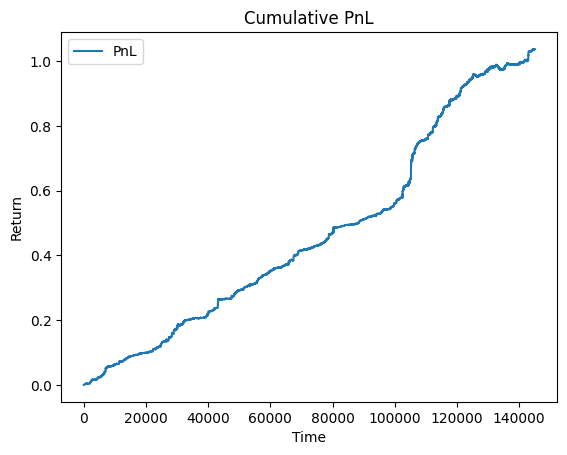

Sharpe Ratio for the epoch: 9.9751
Average Weights:



Weight
Cash  8.837551e-01
FICO  2.611183e-02
NVR   1.732177e-02
MTD   1.435413e-02
MPWR  1.079210e-02
...            ...
ROST  1.880321e-14
PARA  1.879875e-14
DOW   1.847530e-14
ALB   1.793321e-14
AAL   1.522437e-14

[489 rows x 1 columns]

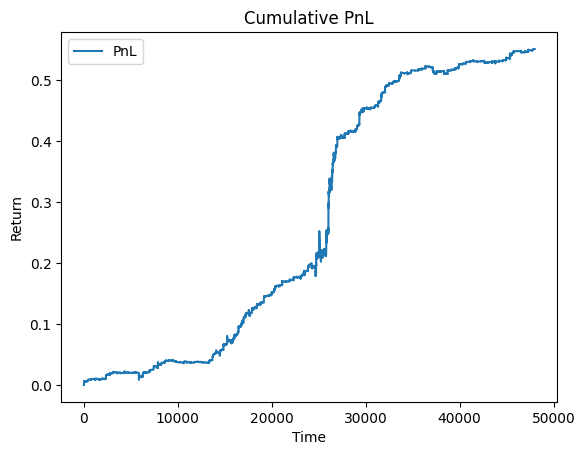

 32%|███▏      | 319/1000 [4:22:00<9:06:46, 48.17s/it]

Sharpe Ratio for the epoch: 15.9846
Average Weights:



Weight
Cash  9.151986e-01
MPWR  2.195712e-02
FICO  1.574630e-02
MTD   1.000290e-02
NVR   6.859879e-03
...            ...
PARA  2.092113e-14
ROST  2.088613e-14
DOW   2.050804e-14
ALB   2.004989e-14
AAL   1.698473e-14

[489 rows x 1 columns]

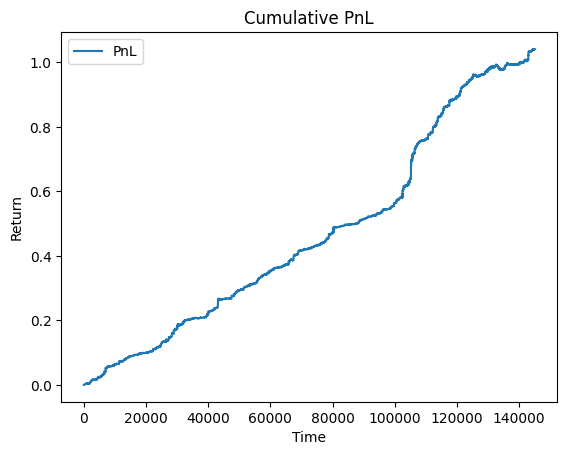

Sharpe Ratio for the epoch: 9.9819
Average Weights:



Weight
Cash  8.840736e-01
FICO  2.610475e-02
NVR   1.726441e-02
MTD   1.436616e-02
MPWR  1.067484e-02
...            ...
ROST  1.755962e-14
PARA  1.748396e-14
DOW   1.724661e-14
ALB   1.673295e-14
AAL   1.420576e-14

[489 rows x 1 columns]

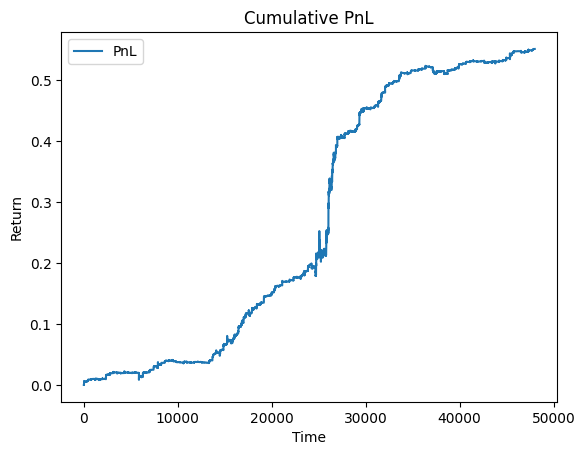

 32%|███▏      | 324/1000 [4:26:02<9:03:46, 48.26s/it]

Sharpe Ratio for the epoch: 16.0289
Average Weights:



Weight
Cash  9.152482e-01
MPWR  2.191691e-02
FICO  1.572928e-02
MTD   1.003053e-02
NVR   6.880085e-03
...            ...
ROST  1.960579e-14
PARA  1.956477e-14
DOW   1.924369e-14
ALB   1.880617e-14
AAL   1.593135e-14

[489 rows x 1 columns]

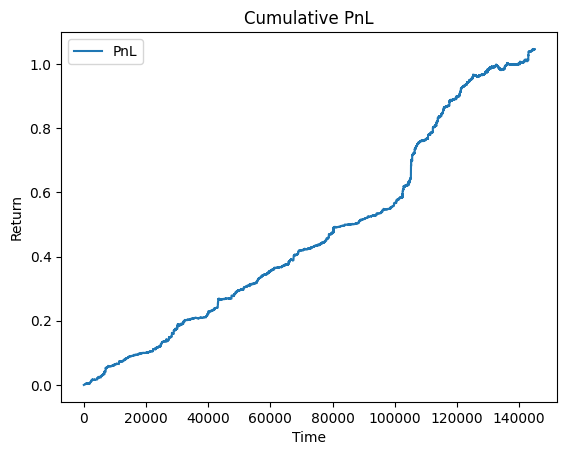

Sharpe Ratio for the epoch: 9.9888
Average Weights:



Weight
Cash  8.844164e-01
FICO  2.607861e-02
NVR   1.719455e-02
MTD   1.437671e-02
MPWR  1.055163e-02
...            ...
ROST  1.642261e-14
PARA  1.629045e-14
DOW   1.612384e-14
ALB   1.563777e-14
AAL   1.327596e-14

[489 rows x 1 columns]

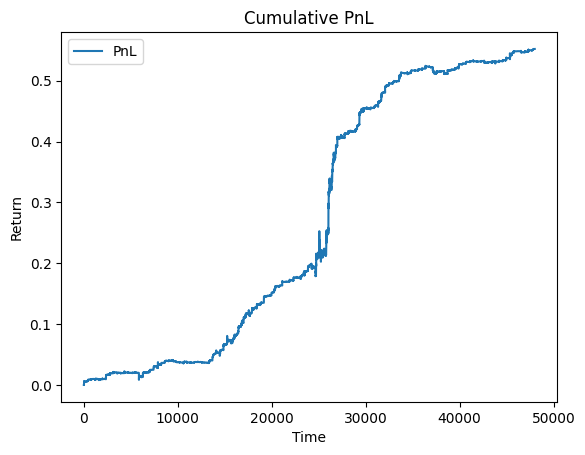

 33%|███▎      | 329/1000 [4:30:02<8:57:51, 48.10s/it]

Sharpe Ratio for the epoch: 16.0718
Average Weights:



Weight
Cash  9.153176e-01
MPWR  2.186784e-02
FICO  1.570744e-02
MTD   1.005414e-02
NVR   6.900727e-03
...            ...
ROST  1.842275e-14
PARA  1.832039e-14
DOW   1.807619e-14
ALB   1.765922e-14
AAL   1.495956e-14

[489 rows x 1 columns]

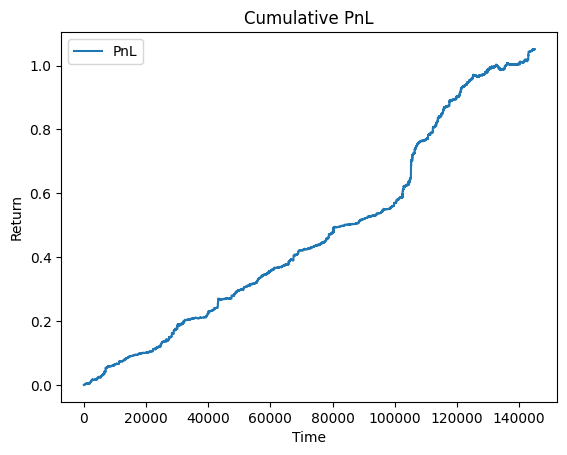

Sharpe Ratio for the epoch: 9.9934
Average Weights:



Weight
Cash  8.846805e-01
FICO  2.607201e-02
NVR   1.712854e-02
MTD   1.439108e-02
MPWR  1.043564e-02
...            ...
ROST  1.538856e-14
PARA  1.521176e-14
DOW   1.510338e-14
ALB   1.464351e-14
AAL   1.243156e-14

[489 rows x 1 columns]

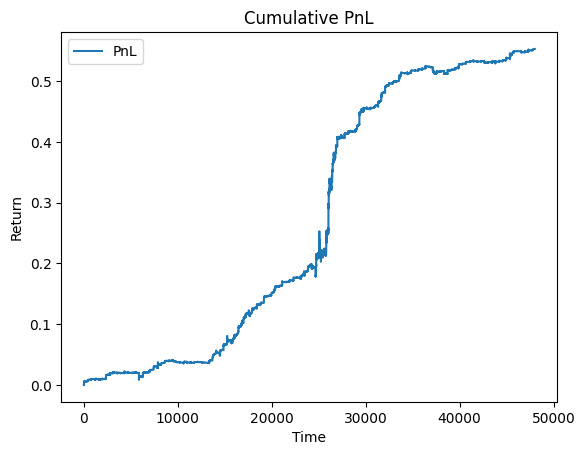

 33%|███▎      | 334/1000 [4:34:03<8:53:49, 48.09s/it]

Sharpe Ratio for the epoch: 16.1163
Average Weights:



Weight
Cash  9.153709e-01
MPWR  2.182307e-02
FICO  1.568696e-02
MTD   1.007991e-02
NVR   6.921427e-03
...            ...
ROST  1.733522e-14
PARA  1.718357e-14
DOW   1.700390e-14
ALB   1.660701e-14
AAL   1.406758e-14

[489 rows x 1 columns]

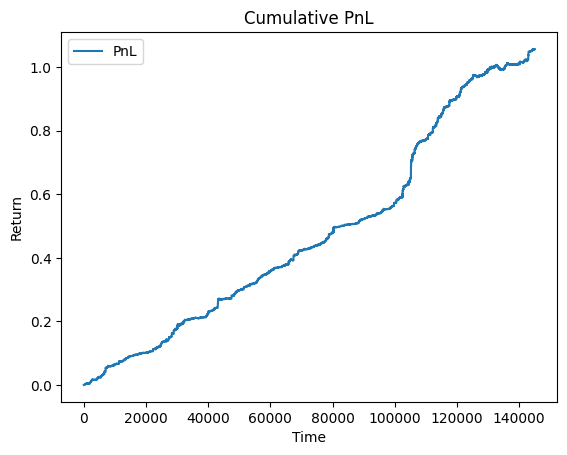

Sharpe Ratio for the epoch: 9.9980
Average Weights:



Weight
Cash  8.850227e-01
FICO  2.604816e-02
NVR   1.706214e-02
MTD   1.439807e-02
MPWR  1.031506e-02
...            ...
ROST  1.442389e-14
PARA  1.421239e-14
DOW   1.415220e-14
ALB   1.371783e-14
AAL   1.164511e-14

[489 rows x 1 columns]

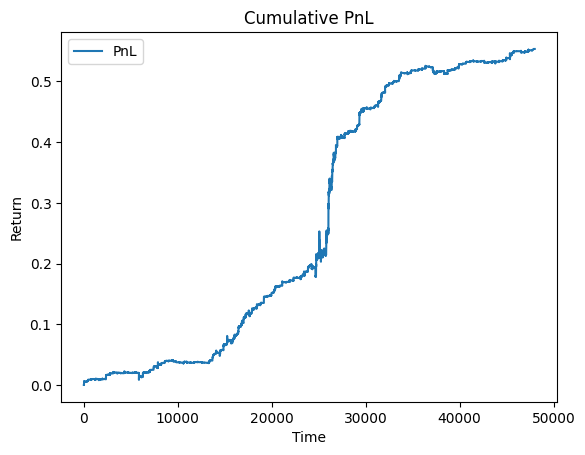

 34%|███▍      | 339/1000 [4:38:06<8:52:05, 48.30s/it]

Sharpe Ratio for the epoch: 16.1582
Average Weights:



Weight
Cash  9.154582e-01
MPWR  2.177932e-02
FICO  1.565868e-02
MTD   1.009989e-02
NVR   6.936546e-03
...            ...
ROST  1.632193e-14
PARA  1.613103e-14
DOW   1.600537e-14
ALB   1.562820e-14
AAL   1.323754e-14

[489 rows x 1 columns]

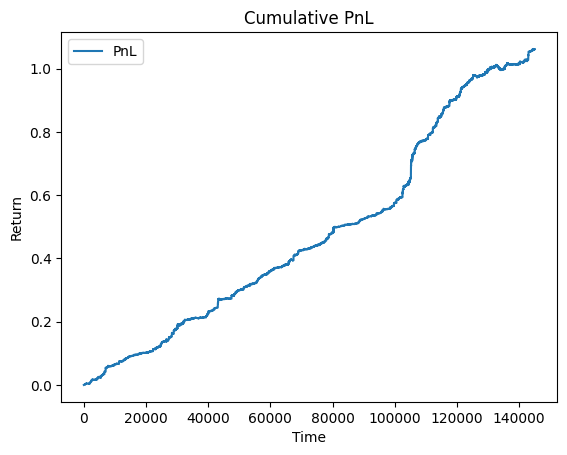

Sharpe Ratio for the epoch: 10.0042
Average Weights:



Weight
Cash  8.853357e-01
FICO  2.602840e-02
NVR   1.700021e-02
MTD   1.440520e-02
MPWR  1.020880e-02
...            ...
ROST  1.353973e-14
PARA  1.330162e-14
DOW   1.328100e-14
ALB   1.287069e-14
AAL   1.092513e-14

[489 rows x 1 columns]

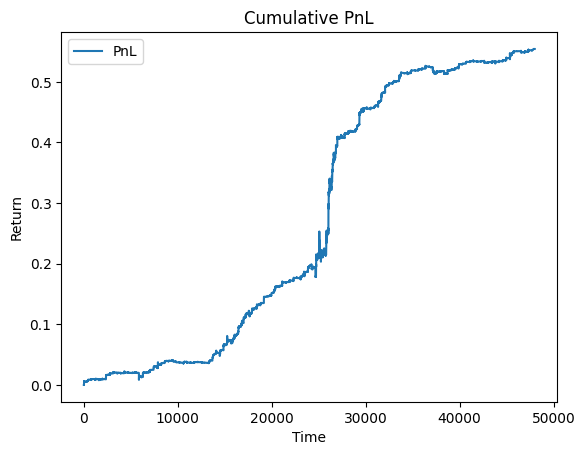

 34%|███▍      | 344/1000 [4:42:08<8:47:47, 48.27s/it]

Sharpe Ratio for the epoch: 16.2007
Average Weights:



Weight
Cash  9.155077e-01
MPWR  2.173253e-02
FICO  1.564156e-02
MTD   1.012388e-02
NVR   6.954793e-03
...            ...
ROST  1.539459e-14
PARA  1.517262e-14
DOW   1.509200e-14
ALB   1.473366e-14
AAL   1.247878e-14

[489 rows x 1 columns]

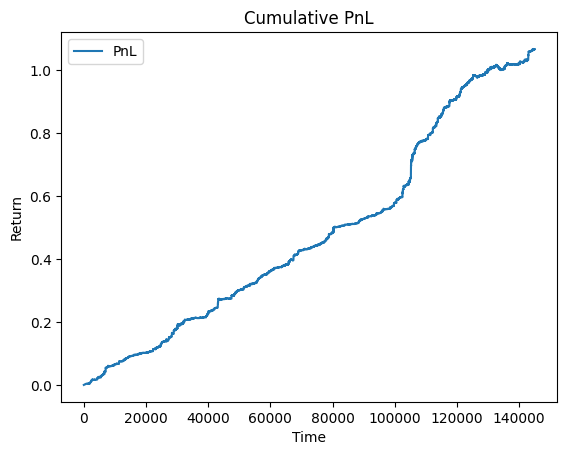

Sharpe Ratio for the epoch: 10.0100
Average Weights:



Weight
Cash  8.856321e-01
FICO  2.601396e-02
NVR   1.693855e-02
MTD   1.441278e-02
MPWR  1.009736e-02
...            ...
MNST  1.272689e-14
DOW   1.248085e-14
PARA  1.246910e-14
ALB   1.209343e-14
AAL   1.026429e-14

[489 rows x 1 columns]

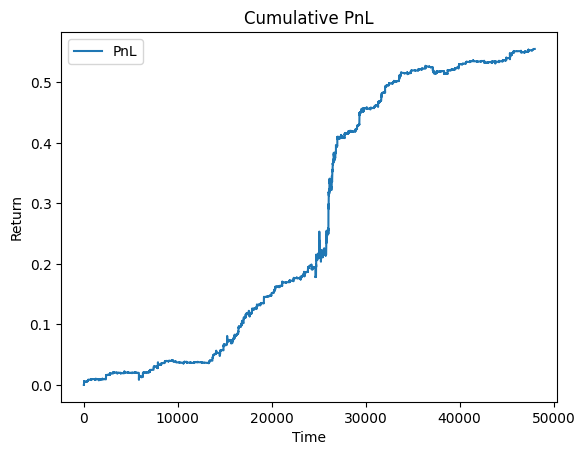

 35%|███▍      | 349/1000 [4:46:09<8:42:44, 48.18s/it]

Sharpe Ratio for the epoch: 16.2405
Average Weights:



Weight
Cash  9.156149e-01
MPWR  2.167814e-02
FICO  1.561655e-02
MTD   1.014141e-02
NVR   6.968789e-03
...            ...
ROST  1.451883e-14
PARA  1.427268e-14
DOW   1.423008e-14
ALB   1.389013e-14
AAL   1.176310e-14

[489 rows x 1 columns]

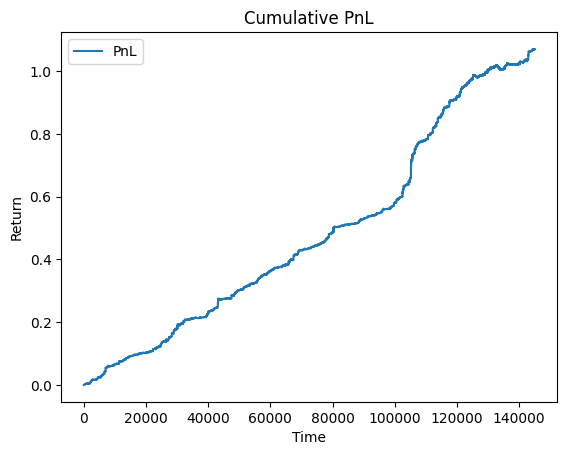

Sharpe Ratio for the epoch: 10.0166
Average Weights:



Weight
Cash  8.859485e-01
FICO  2.600621e-02
NVR   1.687460e-02
MTD   1.442007e-02
MPWR  9.994046e-03
...            ...
MNST  1.196400e-14
DOW   1.173383e-14
PARA  1.169542e-14
ALB   1.136817e-14
AAL   9.647704e-15

[489 rows x 1 columns]

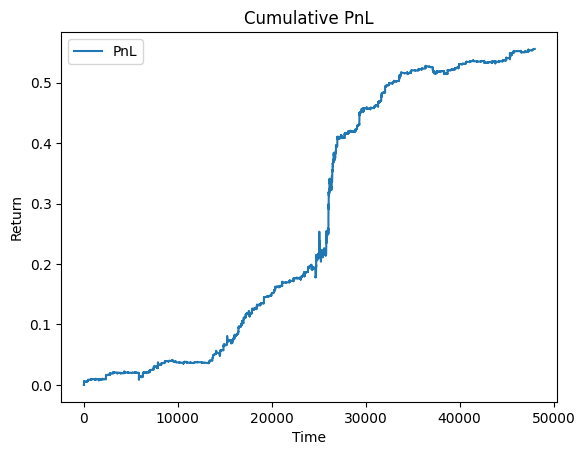

 35%|███▌      | 354/1000 [4:50:09<8:37:17, 48.05s/it]

Sharpe Ratio for the epoch: 16.2830
Average Weights:



Weight
Cash  9.156390e-01
MPWR  2.163996e-02
FICO  1.560060e-02
MTD   1.016804e-02
NVR   6.991631e-03
...            ...
ROST  1.372316e-14
PARA  1.345831e-14
DOW   1.344732e-14
ALB   1.312463e-14
AAL   1.111359e-14

[489 rows x 1 columns]

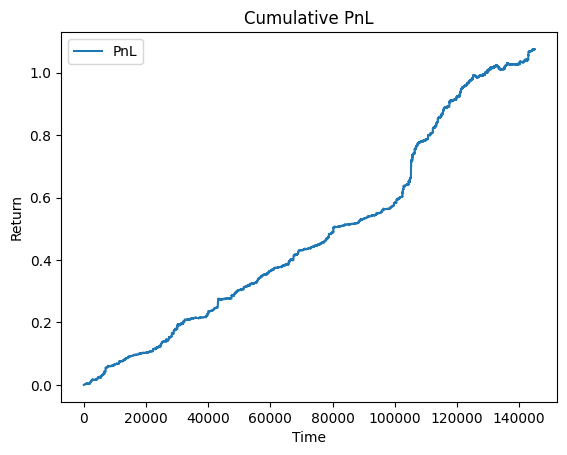

Sharpe Ratio for the epoch: 10.0217
Average Weights:



Weight
Cash  8.863218e-01
FICO  2.595261e-02
NVR   1.680794e-02
MTD   1.441755e-02
MPWR  9.875494e-03
...            ...
MNST  1.125378e-14
DOW   1.103856e-14
PARA  1.097849e-14
ALB   1.069370e-14
AAL   9.074123e-15

[489 rows x 1 columns]

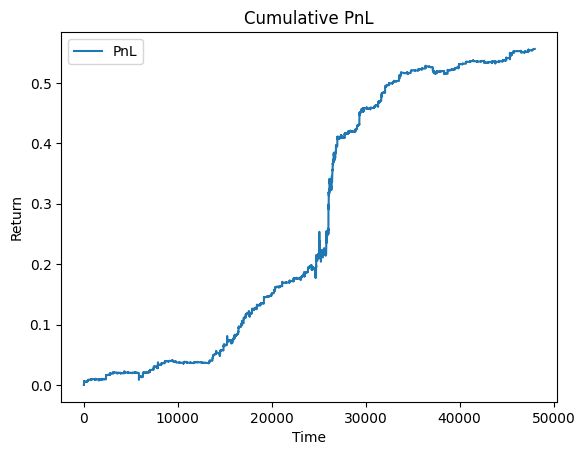

 36%|███▌      | 359/1000 [4:54:10<8:34:05, 48.12s/it]

Sharpe Ratio for the epoch: 16.3201
Average Weights:



Weight
Cash  9.158401e-01
MPWR  2.156032e-02
FICO  1.555881e-02
MTD   1.017188e-02
NVR   6.997987e-03
...            ...
ROST  1.295136e-14
DOW   1.268838e-14
PARA  1.267319e-14
ALB   1.238287e-14
AAL   1.048431e-14

[489 rows x 1 columns]

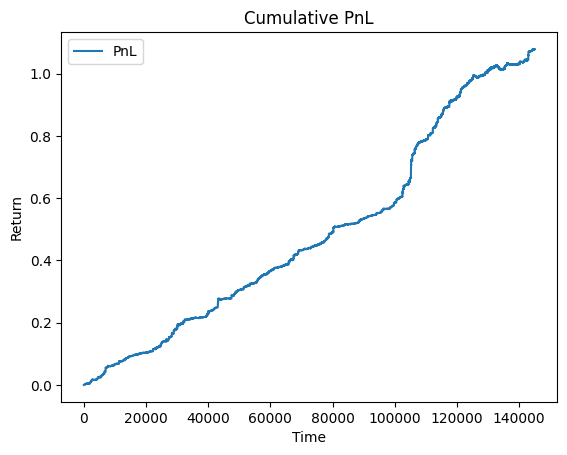

Sharpe Ratio for the epoch: 10.0297
Average Weights:



Weight
Cash  8.866522e-01
FICO  2.593982e-02
NVR   1.673883e-02
MTD   1.442327e-02
MPWR  9.778651e-03
...            ...
MNST  1.059665e-14
DOW   1.039487e-14
PARA  1.031752e-14
ALB   1.006953e-14
AAL   8.543499e-15

[489 rows x 1 columns]

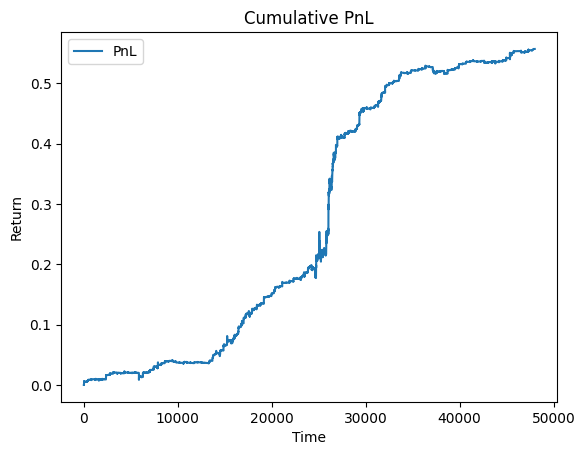

 36%|███▋      | 364/1000 [4:58:12<8:31:19, 48.24s/it]

Sharpe Ratio for the epoch: 16.3586
Average Weights:



Weight
Cash  9.159265e-01
MPWR  2.150839e-02
FICO  1.553511e-02
MTD   1.018775e-02
NVR   7.014109e-03
...            ...
ROST  1.225215e-14
DOW   1.200128e-14
PARA  1.196425e-14
ALB   1.171158e-14
AAL   9.914687e-15

[489 rows x 1 columns]

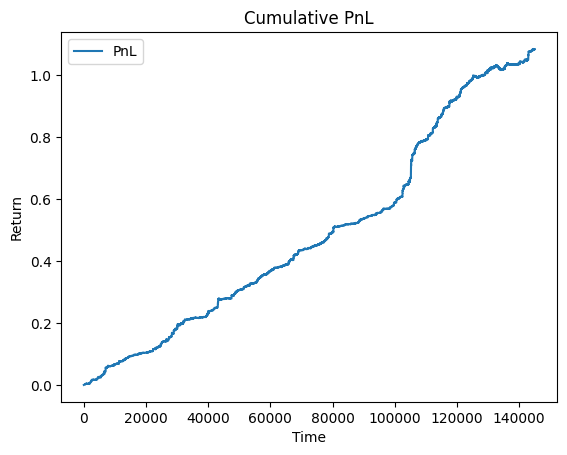

Sharpe Ratio for the epoch: 10.0350
Average Weights:



Weight
Cash  8.869300e-01
FICO  2.592558e-02
NVR   1.668878e-02
MTD   1.443409e-02
MPWR  9.680942e-03
...            ...
MNST  9.993187e-15
DOW   9.804019e-15
PARA  9.712646e-15
ALB   9.496849e-15
AAL   8.056467e-15

[489 rows x 1 columns]

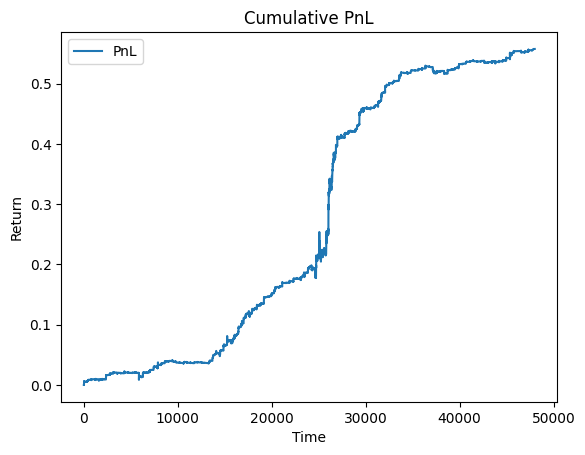

 37%|███▋      | 369/1000 [5:02:14<8:27:56, 48.30s/it]

Sharpe Ratio for the epoch: 16.3962
Average Weights:



Weight
Cash  9.159993e-01
MPWR  2.146833e-02
FICO  1.551410e-02
MTD   1.020275e-02
NVR   7.028749e-03
...            ...
ROST  1.159983e-14
DOW   1.136029e-14
PARA  1.130529e-14
ALB   1.108587e-14
AAL   9.383621e-15

[489 rows x 1 columns]

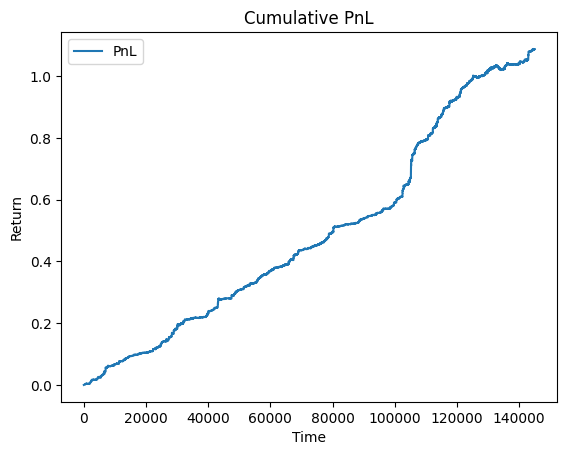

Sharpe Ratio for the epoch: 10.0406
Average Weights:



Weight
Cash  8.872027e-01
FICO  2.590751e-02
NVR   1.663486e-02
MTD   1.444438e-02
MPWR  9.587158e-03
...            ...
MNST  9.432644e-15
DOW   9.254913e-15
PARA  9.152473e-15
ALB   8.965026e-15
AAL   7.604112e-15

[489 rows x 1 columns]

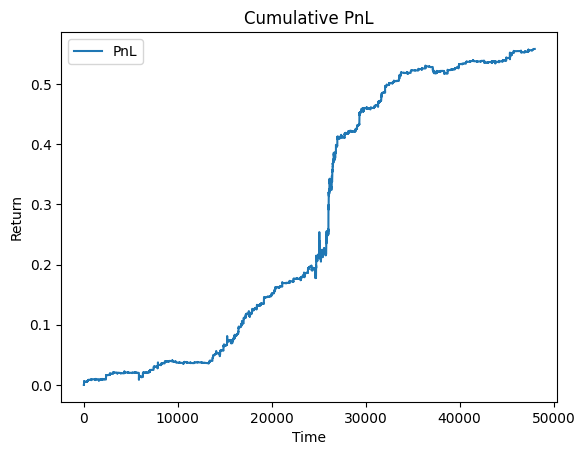

 37%|███▋      | 374/1000 [5:06:15<8:22:12, 48.14s/it]

Sharpe Ratio for the epoch: 16.4336
Average Weights:



Weight
Cash  9.160793e-01
MPWR  2.142547e-02
FICO  1.549150e-02
MTD   1.021458e-02
NVR   7.042667e-03
...            ...
ROST  1.098973e-14
DOW   1.076120e-14
PARA  1.069109e-14
ALB   1.050098e-14
AAL   8.887390e-15

[489 rows x 1 columns]

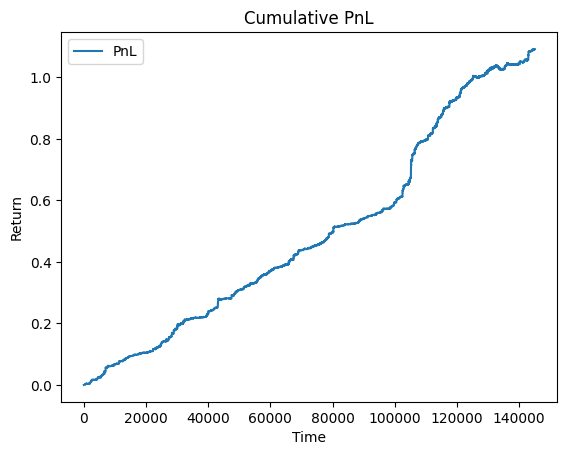

Sharpe Ratio for the epoch: 10.0469
Average Weights:



Weight
Cash  8.874810e-01
FICO  2.588055e-02
NVR   1.657712e-02
MTD   1.445025e-02
MPWR  9.492208e-03
...            ...
MNST  8.909541e-15
DOW   8.742471e-15
PARA  8.631134e-15
ALB   8.468617e-15
AAL   7.182097e-15

[489 rows x 1 columns]

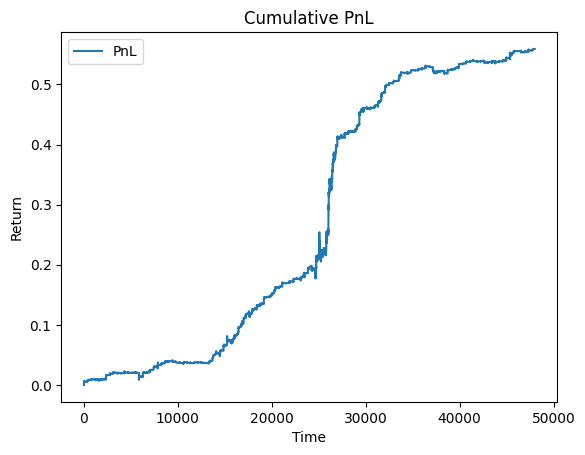

 38%|███▊      | 379/1000 [5:10:16<8:18:42, 48.19s/it]

Sharpe Ratio for the epoch: 16.4707
Average Weights:



Weight
Cash  9.161593e-01
MPWR  2.138145e-02
FICO  1.546741e-02
MTD   1.022766e-02
NVR   7.055959e-03
...            ...
ROST  1.041795e-14
DOW   1.019975e-14
PARA  1.011749e-14
ALB   9.953225e-15
AAL   8.422551e-15

[489 rows x 1 columns]

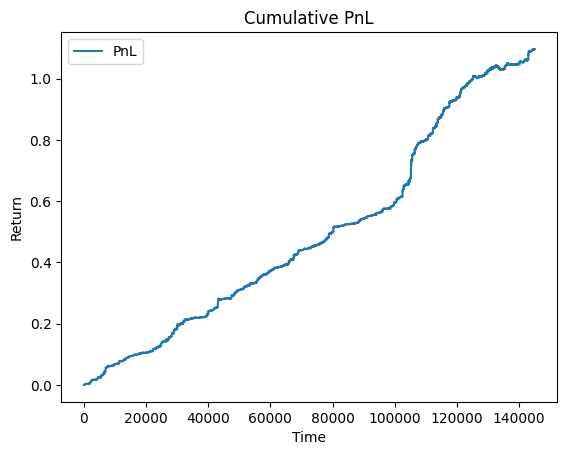

Sharpe Ratio for the epoch: 10.0513
Average Weights:



Weight
Cash  8.877885e-01
FICO  2.584841e-02
NVR   1.651871e-02
MTD   1.445433e-02
MPWR  9.401490e-03
...            ...
MNST  8.416516e-15
DOW   8.259382e-15
PARA  8.141418e-15
ALB   8.000971e-15
AAL   6.784393e-15

[489 rows x 1 columns]

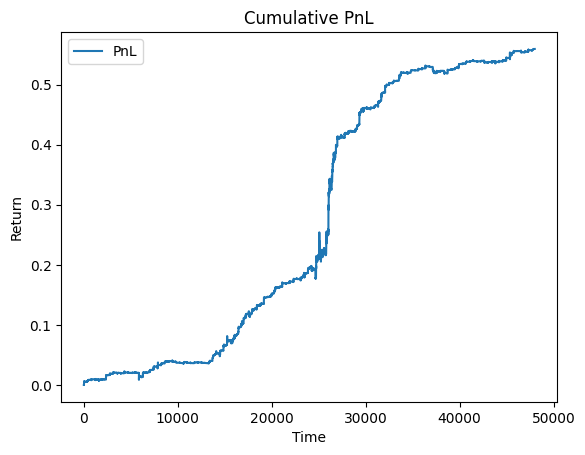

 38%|███▊      | 384/1000 [5:14:17<8:13:37, 48.08s/it]

Sharpe Ratio for the epoch: 16.5083
Average Weights:



Weight
Cash  9.162698e-01
MPWR  2.132937e-02
FICO  1.543831e-02
MTD   1.023435e-02
NVR   7.068448e-03
...            ...
ROST  9.878615e-15
DOW   9.670424e-15
PARA  9.578482e-15
ALB   9.436925e-15
AAL   7.984408e-15

[489 rows x 1 columns]

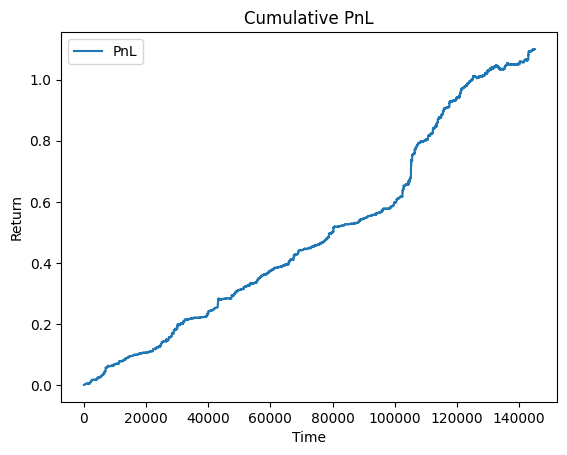

Sharpe Ratio for the epoch: 10.0557
Average Weights:



Weight
Cash  8.881013e-01
FICO  2.581640e-02
NVR   1.646397e-02
MTD   1.445227e-02
MPWR  9.311665e-03
...            ...
MNST  7.955351e-15
DOW   7.807469e-15
PARA  7.684739e-15
ALB   7.563558e-15
AAL   6.412432e-15

[489 rows x 1 columns]

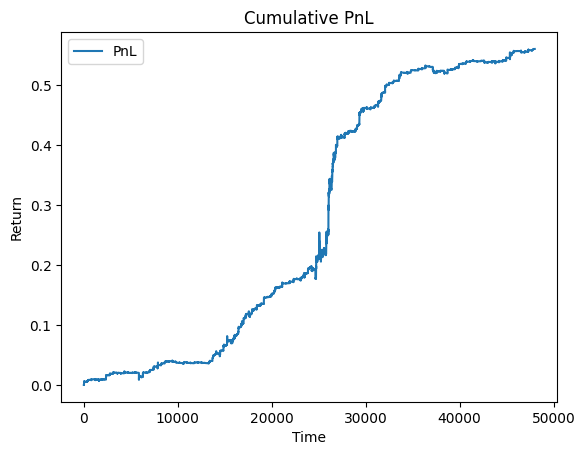

 39%|███▉      | 388/1000 [5:17:30<8:11:56, 48.23s/it]

In [ ]:
batch_size = batch_size_config[0]
pipeline = FeaturesPipeline(
    path_to_data,
    padding=padding,
    batch_size=batch_size,
    split_dates=split_dates,
    split_names=split_names
)

cmf_dim = asset_dim = num_assets = None
for common_feats, asset_feats, fut_ret, _, _ in tqdm(pipeline.iterate('train'), desc="Loading features"):
    cmf_dim = common_feats.shape[1]
    asset_dim = asset_feats.shape[2]
    num_assets = asset_feats.shape[1]
    break

print(f"cmf_dim: {cmf_dim}, asset_dim: {asset_dim}, num_assets: {num_assets}")

# model = LSTMPortfolioAllocator(
#     cmf_dim=cmf_dim,
#     num_assets=num_assets,
# )

model = SimplePortfolioAllocator(
    cmf_dim=cmf_dim,
    #asset_dim=asset_dim,
    num_assets=num_assets,
)

optimizer = torch.optim.Adam(model.parameters(), lr=adam_lr)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in tqdm(range(num_epochs)):
    if epoch in batch_size_config:
        print(f"Changing batch size to {batch_size_config[epoch]} at epoch {epoch}")
        batch_size = batch_size_config[epoch]
        pipeline = FeaturesPipeline(
            path_to_data,
            padding=padding,
            batch_size=batch_size,
            split_dates=split_dates,
            split_names=split_names
        )

    loss_fn = StreamingSharpeLoss(
        fee=fee,
        asset_names=pipeline.reader.asset_names + ['Cash'],  # Добавляем Cash в список активов
    )
    loss_fn.reset()
    pipeline.reset()
    for common_feats, asset_feats, fut_ret, min_prices, market_caps in pipeline.iterate('train'):

        # Перевод в тензоры
        common_feats = torch.tensor(common_feats.values, dtype=torch.float32).to(device)       # (T, d_common)
        asset_feats  = torch.tensor(asset_feats,         dtype=torch.float32).to(device)       # (T, n_assets, d_asset)
        fut_ret      = torch.tensor(fut_ret.values,      dtype=torch.float32).to(device)       # (T, n_assets)
        min_prices  = torch.tensor(min_prices.values,   dtype=torch.float32).to(device)       # (T, n_assets)
        market_caps = torch.tensor(market_caps,  dtype=torch.float32).to(device)       # (T, n_assets)

        if len(common_feats) != batch_size:
            continue

        optimizer.zero_grad()

        # Вычисляем веса
        weights = model(common_feats, asset_feats)  # (T, n_assets)

        
        # Обновляем метрику
        loss_value = loss_fn.forward(
            weights=weights,
            returns=fut_ret,
            min_prices=min_prices,
            market_caps=market_caps
        )
        loss_value.backward()

        optimizer.step()

    if (epoch + 1) % log_freq == 0:
        _, weights_df = loss_fn.plot_whole_epoch_loss()  # Выводим Sharpe Ratio за эпоху
        weights_df.to_csv(f'weights_epoch_{epoch + 1}.csv')  # Сохраняем веса в CSV
    loss_fn.reset()  # Сбрасываем метрику для следующей эпохи

    for common_feats, asset_feats, fut_ret, min_prices, market_caps in pipeline.iterate('test'):
        common_feats = torch.tensor(common_feats.values, dtype=torch.float32).to(device)
        asset_feats  = torch.tensor(asset_feats,         dtype=torch.float32).to(device)
        fut_ret      = torch.tensor(fut_ret.values,      dtype=torch.float32).to(device)
        min_prices  = torch.tensor(min_prices.values,   dtype=torch.float32).to(device)
        market_caps = torch.tensor(market_caps,  dtype=torch.float32).to(device)

        if  len(common_feats) != batch_size:
            continue

        weights = model(common_feats, asset_feats)
        loss_fn.forward(weights=weights, returns=fut_ret, min_prices=min_prices, market_caps=market_caps)

    if (epoch + 1) % log_freq == 0:
        loss_fn.plot_whole_epoch_loss()
    loss_fn.reset()

In [ ]:
interesting_assets = ['BKNG', 'FICO', 'GWW', 'AZO']

dct = {}

for common_feats, asset_feats, fut_ret, min_prices, market_caps in pipeline.iterate('train'):
    common_feats = torch.tensor(common_feats.values, dtype=torch.float32).to(device)
    asset_feats  = torch.tensor(asset_feats,         dtype=torch.float32).to(device)
    fut_ret      = torch.tensor(fut_ret.values,      dtype=torch.float32).to(device)
    min_prices  = torch.tensor(min_prices.values,   dtype=torch.float32).to(device)
    market_caps = torch.tensor(market_caps,  dtype=torch.float32).to(device)

    if len(common_feats) != batch_size:
        continue

    weights = model(common_feats, asset_feats)
    
    for hor in [1, 5, 10, 20, 60]:
        fut_ret_hor = pd.DataFrame(
            fut_ret.detach().cpu().numpy(),
            columns=pipeline.reader.asset_names
        ).shift(-hor).reset_index(drop=True)

        weights_df = pd.DataFrame(
            weights.detach().cpu().numpy()[:, :-1],  # Убираем Cash
            columns=pipeline.reader.asset_names
        )

        weights_df = weights_df[fut_ret_hor.isna().sum(axis=1) == 0]  # Убираем активы, для которых нет будущих доходностей
        fut_ret_hor = fut_ret_hor[fut_ret_hor.isna().sum(axis=1) == 0]

        for asset in interesting_assets:
            if hor not in dct:
                dct[hor] = {}
            if asset not in dct[hor]:
                dct[hor][asset] = {}
            
            if 'weights' not in dct[hor][asset]:
                dct[hor][asset]['weights'] = []
                dct[hor][asset]['fut_ret'] = []

            dct[hor][asset]['weights'].extend(weights_df[asset].tolist())
            dct[hor][asset]['fut_ret'].extend(fut_ret_hor[asset].tolist())

    #         print(f'For asset {asset} at horizon {hor} minutes: Corr = '
    #               f'{weights_df[asset].corr(fut_ret_hor[asset]):.4f})')
    #     print()
    # print()
dct

{1: {'BKNG': {'weights': [0.16442978382110596,
    0.02194208651781082,
    0.21527691185474396,
    0.1949617862701416,
    0.09318862110376358,
    0.12841227650642395,
    0.05433095991611481,
    0.027566658332943916,
    0.05343879386782646,
    0.11364799737930298,
    0.02651677280664444,
    0.05344570055603981,
    0.05119584500789642,
    0.005405851174145937,
    0.2031354010105133,
    0.08682043850421906,
    0.11399022489786148,
    0.11715784668922424,
    0.0815720334649086,
    0.15345562994480133,
    0.047921981662511826,
    0.055081527680158615,
    0.005914127454161644,
    0.01362829003483057,
    0.012531246989965439,
    0.02177036926150322,
    0.0050817527808249,
    0.022087642922997475,
    0.0028341743163764477,
    0.018621545284986496,
    0.00025771415675990283,
    0.013876824639737606,
    0.012211414985358715,
    0.07246901094913483,
    0.03908181190490723,
    0.03939085826277733,
    0.10840768367052078,
    0.020003212615847588,
    0.0034329711

In [ ]:
for hor in dct:
    print(f'Horizon: {hor} minutes')
    for asset in interesting_assets:
        if asset in dct[hor]:
            weights = dct[hor][asset]['weights']
            fut_ret = dct[hor][asset]['fut_ret']
            if len(weights) > 0 and len(fut_ret) > 0:
                corr = pd.Series(weights).corr(pd.Series(fut_ret))
                print(f'Asset: {asset}, Correlation: {corr:.4f}')
            else:
                print(f'Asset: {asset}, No data available')
    print()
    print('-' * 40)


Horizon: 1 minutes
Asset: BKNG, Correlation: 0.0514
Asset: FICO, Correlation: 0.0581
Asset: GWW, Correlation: 0.0518
Asset: AZO, Correlation: 0.0414

----------------------------------------
Horizon: 5 minutes
Asset: BKNG, Correlation: 0.0098
Asset: FICO, Correlation: 0.0178
Asset: GWW, Correlation: -0.0016
Asset: AZO, Correlation: 0.0144

----------------------------------------
Horizon: 10 minutes
Asset: BKNG, Correlation: 0.0050
Asset: FICO, Correlation: 0.0083
Asset: GWW, Correlation: 0.0009
Asset: AZO, Correlation: -0.0028

----------------------------------------
Horizon: 20 minutes
Asset: BKNG, Correlation: 0.0024
Asset: FICO, Correlation: 0.0049
Asset: GWW, Correlation: 0.0014
Asset: AZO, Correlation: -0.0011

----------------------------------------
Horizon: 60 minutes
Asset: BKNG, Correlation: 0.0011
Asset: FICO, Correlation: 0.0004
Asset: GWW, Correlation: -0.0027
Asset: AZO, Correlation: 0.0003

----------------------------------------
